# Forecasting flight delays for domestic flights in US 

The ideia behind this project is to develop a model to predict flight delays (in minutes) at arrival for domestic flights in the US. The data used here was download from the Bureau of Transportation Statistics ([BTS](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236)). 

The dataset comprises data between November 2017 and October 2018, with almost 7 millions training examples. It has the following features: 

----------------
----------------
**Features:**
* Year: 2017 to 2018.             
* Month: 1 to 12.                   
* Day_of_month: 1 to 31.            
* Day_of_week: 1 (Monday) to 7 (Sunday), 9 (Unknown).                       
* Op_carrier: Code assigned by IATA and commonly used to identify a carrier. May not be unique.         
* Op_carrier_fl_num: Flight number.             
* Origin: Origin airport.                               
* Origin_city_name: City name of the origin airport.                
* Origin_state_nm: State code of the origin airport.                  
* Dest: Destination airport.              
* Dest_city_name: City name of the destination airport.                
* Dest_state_nm: State name of the destination airport.                   
* CRS_dep_time: The schedule gate departure time (local time: hhmm).           
* Dep_delay_new: Difference in minutes between scheduled and actual departure time. Early departures set to 0.                 
* CRS_arr_time: The schedule gate arrival time (local time: hhmm).                                                    
* Arr_delay_new: Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0.                  
* Cancelled: Cancelled flight indicator, 0 (No), 1 (Yes).                                                       
* Diverted: Diverted flight indicator, 0 (No), 1 (Yes).               
* CRS_elapsed_time: The schedule elapsed time of flight from gate to gate, in minutes.                  
* Distance: Distance between aiportes, in miles.                      
---------------------

## 1. Overview of the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
jun_2017 = pd.read_csv('./CSV_files/2017_06.csv')
jul_2017 = pd.read_csv('./CSV_files/2017_07.csv')
ago_2017 = pd.read_csv('./CSV_files/2017_08.csv')
sep_2017 = pd.read_csv('./CSV_files/2017_09.csv')
oct_2017 = pd.read_csv('./CSV_files/2017_10.csv')
nov_2017 = pd.read_csv('./CSV_files/2017_11.csv')
dec_2017 = pd.read_csv('./CSV_files/2017_12.csv')
jan_2018 = pd.read_csv('./CSV_files/2018_01.csv')
feb_2018 = pd.read_csv('./CSV_files/2018_02.csv')
mar_2018 = pd.read_csv('./CSV_files/2018_03.csv')
apr_2018 = pd.read_csv('./CSV_files/2018_04.csv')
may_2018 = pd.read_csv('./CSV_files/2018_05.csv')
jun_2018 = pd.read_csv('./CSV_files/2018_06.csv')
jul_2018 = pd.read_csv('./CSV_files/2018_07.csv')
aug_2018 = pd.read_csv('./CSV_files/2018_08.csv')
sep_2018 = pd.read_csv('./CSV_files/2018_09.csv')
oct_2018 = pd.read_csv('./CSV_files/2018_10.csv')

In [3]:
nov_2017.sample(10)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE
438614,2017,11,25,6,DL,1803,RDU,"Raleigh/Durham, NC",North Carolina,ATL,"Atlanta, GA",Georgia,1350,0.0,1525,0.0,0,0,95,356
73001,2017,11,25,6,B6,1479,DCA,"Washington, DC",Virginia,FLL,"Fort Lauderdale, FL",Florida,2000,0.0,2235,0.0,0,0,155,899
219151,2017,11,21,2,OO,4987,SAN,"San Diego, CA",California,LAX,"Los Angeles, CA",California,1015,0.0,1125,0.0,0,0,70,109
284158,2017,11,17,5,EV,4113,EWR,"Newark, NJ",New Jersey,IND,"Indianapolis, IN",Indiana,1535,153.0,1759,155.0,0,0,144,645
235133,2017,11,26,7,OO,4492,EVV,"Evansville, IN",Indiana,DTW,"Detroit, MI",Michigan,645,0.0,922,0.0,0,0,97,363
352611,2017,11,3,5,AA,1470,MIA,"Miami, FL",Florida,LAS,"Las Vegas, NV",Nevada,846,0.0,1102,7.0,0,0,316,2174
131392,2017,11,14,2,WN,673,AUS,"Austin, TX",Texas,DAL,"Dallas, TX",Texas,950,0.0,1045,0.0,0,0,55,189
411170,2017,11,7,2,DL,2865,MSP,"Minneapolis, MN",Minnesota,SEA,"Seattle, WA",Washington,1130,7.0,1319,0.0,0,0,229,1399
28143,2017,11,1,3,UA,296,DEN,"Denver, CO",Colorado,RNO,"Reno, NV",Nevada,1858,0.0,2021,0.0,0,0,143,804
29997,2017,11,17,5,UA,1893,SFO,"San Francisco, CA",California,DEN,"Denver, CO",Colorado,1915,0.0,2242,0.0,0,0,147,967


In [4]:
monthly_csv_dic = {'06/2017':jun_2017,'07/2017':jul_2017,'08/2017':ago_2017,'09/2017':sep_2017,'10/2017':oct_2017,
                   '11/2017':nov_2017, '12/2017':dec_2017, '01/2018':jan_2018, '02/2018':feb_2018, '03/2018':mar_2018, 
                   '04/2018':apr_2018,'05/2018':may_2018, '06/2018':jun_2018, '07/2018':jul_2018, '08/2018':aug_2018, 
                   '09/2018':sep_2018, '10/2018':oct_2018 }

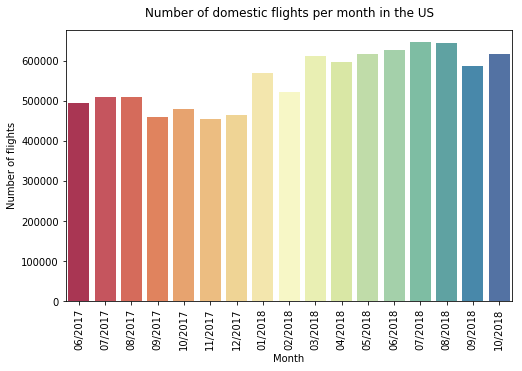

In [5]:
nflights_per_month = [len(df) for df in monthly_csv_dic.values()]
months = list(monthly_csv_dic.keys())

plt.figure(figsize=(8,5))
grid = sns.barplot(x=months, y=nflights_per_month, palette=sns.color_palette("Spectral",17))
grid.set_title('Number of domestic flights per month in the US', y=1.025)
grid.set_xlabel('Month')
grid.set_ylabel('Number of flights')
plt.xticks(rotation=90)
plt.show()

The number of flights per month isn't constant all over the year. Would be that due to seasonality or there were flights that were not included in the data report?
Apparently, the number of flights also increased from 2017 to 2018.

----------
----------

In [138]:
def plot_flights_per_day(df_dict):
    for i in range(5,len(df_dict)):
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        grid = sns.countplot(x='DAY_OF_MONTH', data=list(df_dict.values())[i], palette=sns.color_palette("Spectral",31), 
                             edgecolor='grey', zorder=2)
        grid.set_title(list(df_dict.keys())[i])
        grid.set_xlabel('Days of month')
        grid.set_ylabel('Number of flights')
        plt.ylim(8000, 24000)
        grid.yaxis.grid(which='both', linestyle='--')
        
        plt.subplot(122)
        grid = sns.barplot(x='DAY_OF_MONTH', y='ARR_DELAY_NEW', data=list(df_dict.values())[i], 
                           palette=sns.color_palette("Spectral",31), edgecolor='grey', zorder=2)
        grid.set_title(list(df_dict.keys())[i])
        grid.set_xlabel('Days of month')
        grid.set_ylabel('Average delay (min)')
        plt.ylim(0,30)
        grid.yaxis.grid(which='both', linestyle='--')
        plt.show()

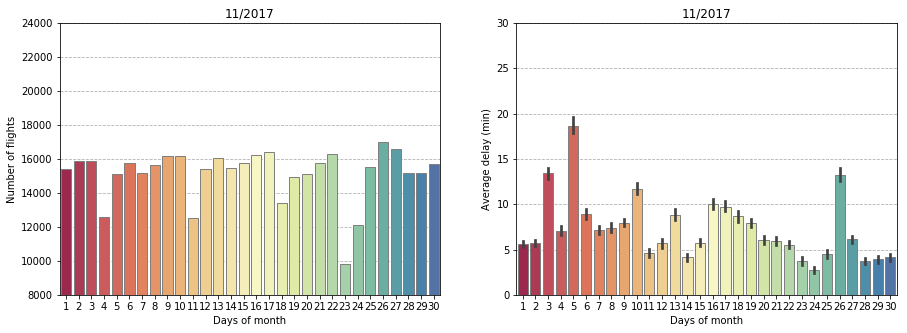

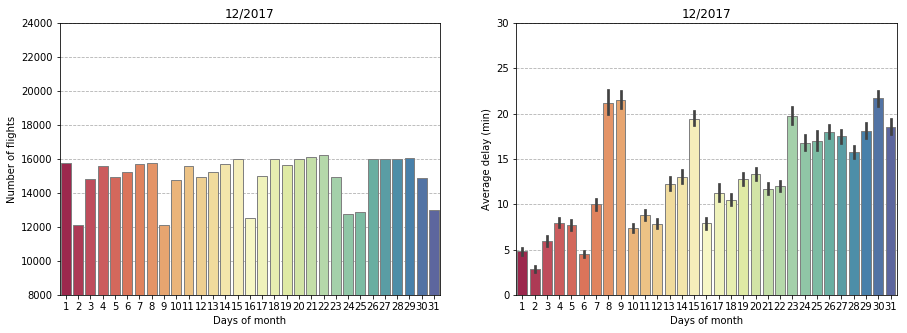

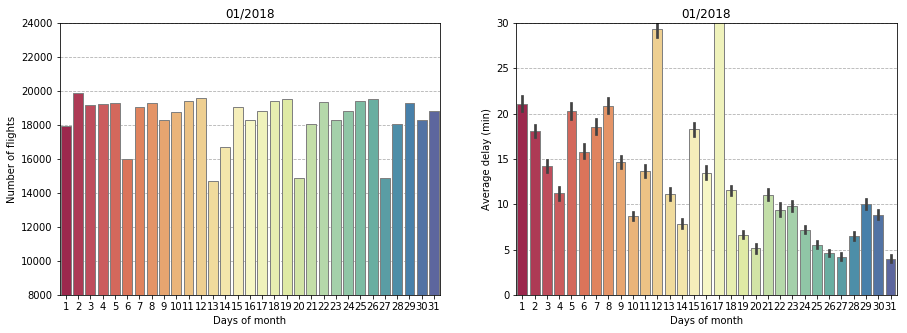

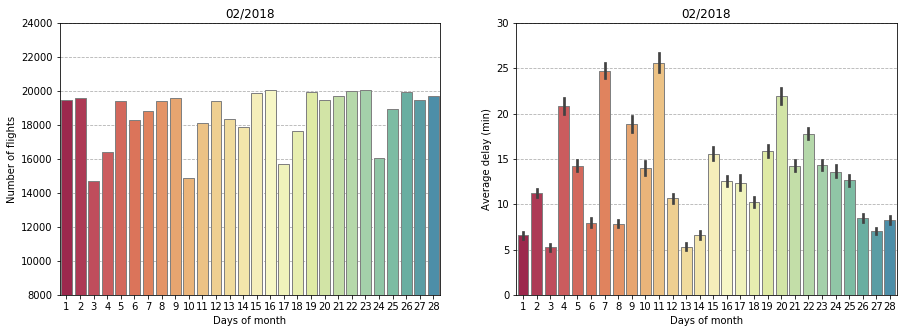

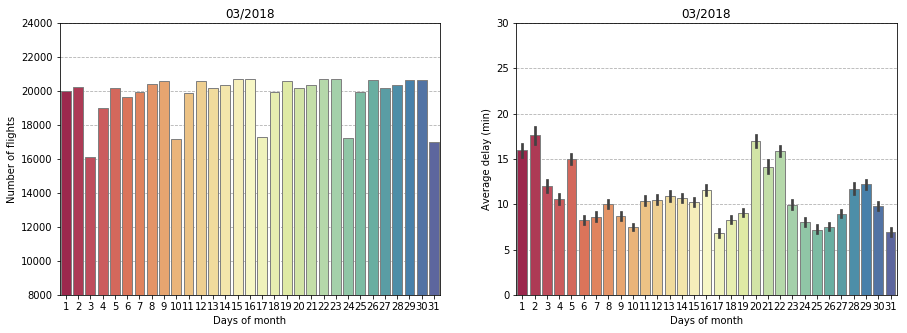

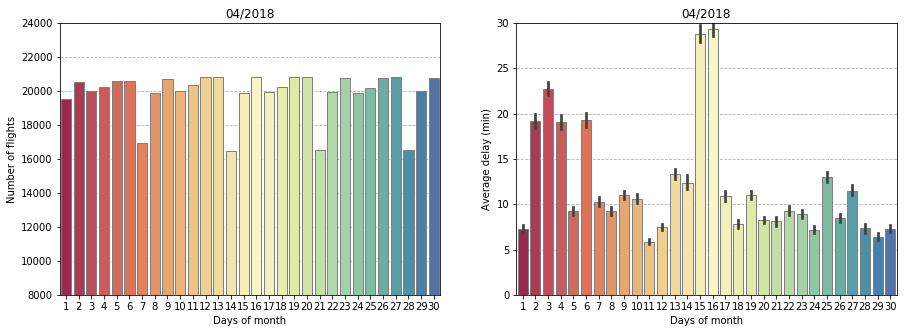

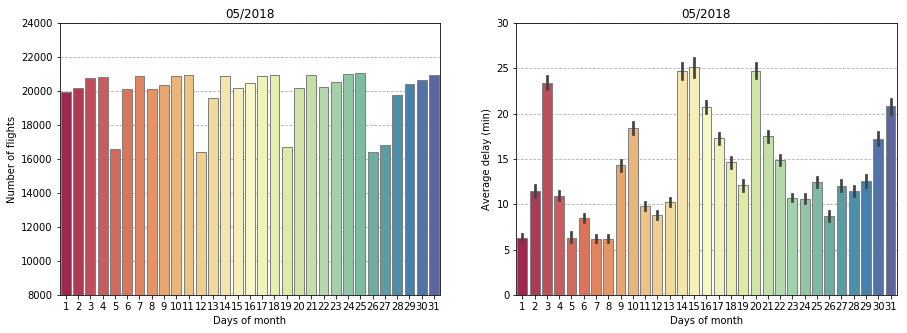

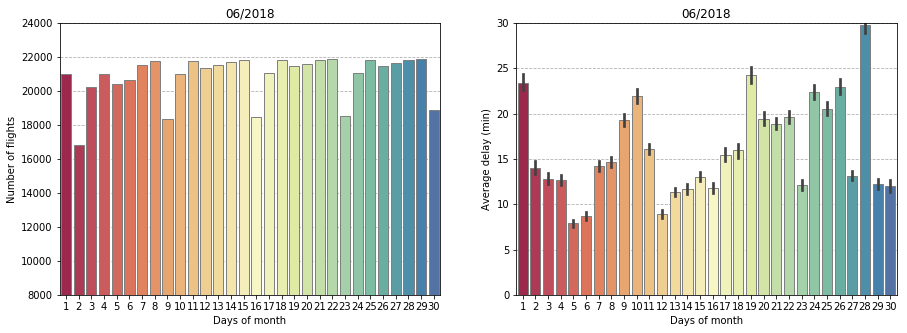

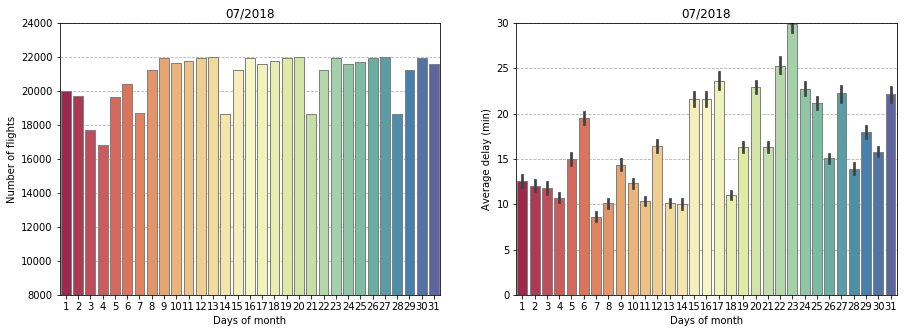

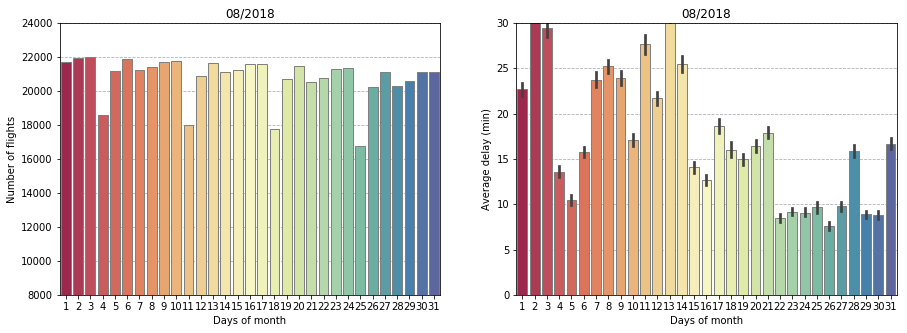

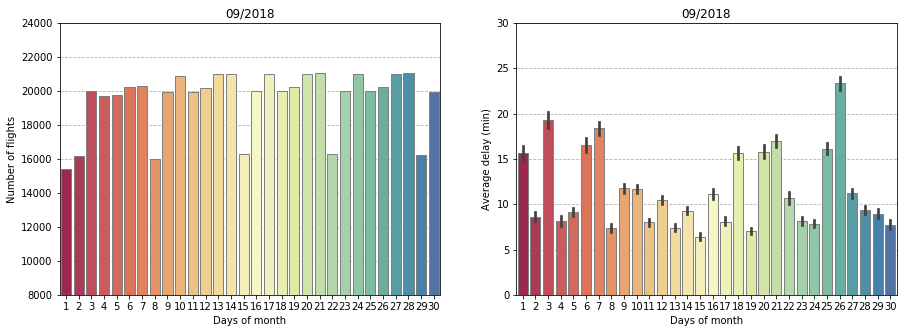

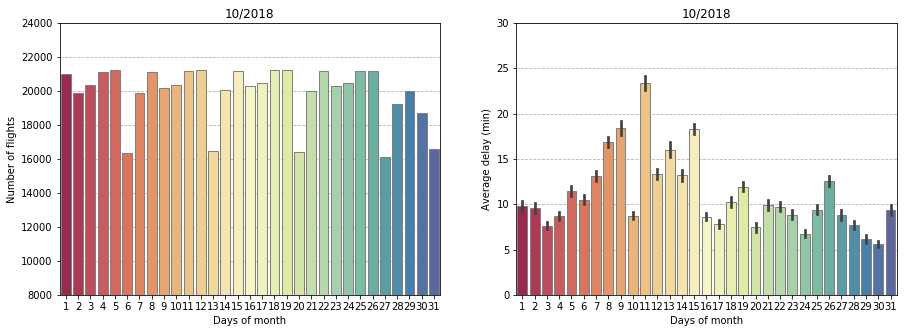

In [139]:
#ploting daily count of flights from November2017 to October2018
plot_flights_per_day(monthly_csv_dic)

-----
-----
There is some kind of periodicity in the flights count, which is probably related to days of week. Interestingly, the number of flights is reduced in approximately 2k every 7 days (it seems to be Saturdays).

-----
-----

In [8]:
# concating the monthly df in one annual df (from Nov2017 to Oct2018)
dataframes = [df for df in monthly_csv_dic.values()]
oneyearflights_raw = pd.concat(dataframes[5:], ignore_index=True)

In [9]:
oneyearflights_raw.sample(10)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE
2179381,2018,3,20,2,VX,1897,LAS,"Las Vegas, NV",Nevada,SFO,"San Francisco, CA",California,649,0.0,825,2.0,0,0,96.0,414
6624440,2018,10,23,2,AA,1227,CLT,"Charlotte, NC",North Carolina,BWI,"Baltimore, MD",Maryland,800,0.0,932,0.0,0,0,92.0,361
3208877,2018,4,26,4,UA,348,OGG,"Kahului, HI",Hawaii,ORD,"Chicago, IL",Illinois,1620,0.0,520,0.0,0,0,480.0,4184
4861669,2018,7,15,7,UA,2183,ORD,"Chicago, IL",Illinois,DLH,"Duluth, MN",Minnesota,2115,0.0,2250,0.0,0,0,95.0,397
881192,2017,12,8,5,DL,1345,TUS,"Tucson, AZ",Arizona,ATL,"Atlanta, GA",Georgia,700,0.0,1226,17.0,0,0,206.0,1541
1422058,2018,1,6,6,DL,2898,PHX,"Phoenix, AZ",Arizona,MSP,"Minneapolis, MN",Minnesota,115,0.0,518,0.0,0,0,183.0,1276
4580574,2018,7,31,2,WN,2229,MSP,"Minneapolis, MN",Minnesota,MDW,"Chicago, IL",Illinois,2215,44.0,2335,34.0,0,0,80.0,349
5080492,2018,7,15,7,OO,3555,MSP,"Minneapolis, MN",Minnesota,MDW,"Chicago, IL",Illinois,1303,0.0,1435,10.0,0,0,92.0,349
4890899,2018,7,5,4,UA,503,ORD,"Chicago, IL",Illinois,FLL,"Fort Lauderdale, FL",Florida,830,73.0,1232,79.0,0,0,182.0,1182
3530284,2018,5,22,2,WN,1481,SJC,"San Jose, CA",California,PDX,"Portland, OR",Oregon,1635,7.0,1820,3.0,0,0,105.0,569


In [10]:
oneyearflights_raw.shape

(6951793, 20)

In [11]:
oneyearflights_raw.info(null_counts=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6951793 entries, 0 to 6951792
Data columns (total 20 columns):
YEAR                 6951793 non-null int64
MONTH                6951793 non-null int64
DAY_OF_MONTH         6951793 non-null int64
DAY_OF_WEEK          6951793 non-null int64
OP_CARRIER           6951793 non-null object
OP_CARRIER_FL_NUM    6951793 non-null int64
ORIGIN               6951793 non-null object
ORIGIN_CITY_NAME     6951793 non-null object
ORIGIN_STATE_NM      6951793 non-null object
DEST                 6951793 non-null object
DEST_CITY_NAME       6951793 non-null object
DEST_STATE_NM        6951793 non-null object
CRS_DEP_TIME         6951793 non-null int64
DEP_DELAY_NEW        6840579 non-null float64
CRS_ARR_TIME         6951793 non-null int64
ARR_DELAY_NEW        6821983 non-null float64
CANCELLED            6951793 non-null int64
DIVERTED             6951793 non-null int64
CRS_ELAPSED_TIME     6951783 non-null float64
DISTANCE             6951793 non-null 

In [12]:
oneyearflights_raw.isnull().sum()

YEAR                      0
MONTH                     0
DAY_OF_MONTH              0
DAY_OF_WEEK               0
OP_CARRIER                0
OP_CARRIER_FL_NUM         0
ORIGIN                    0
ORIGIN_CITY_NAME          0
ORIGIN_STATE_NM           0
DEST                      0
DEST_CITY_NAME            0
DEST_STATE_NM             0
CRS_DEP_TIME              0
DEP_DELAY_NEW        111214
CRS_ARR_TIME              0
ARR_DELAY_NEW        129810
CANCELLED                 0
DIVERTED                  0
CRS_ELAPSED_TIME         10
DISTANCE                  0
dtype: int64

------------
-------------
There are some missing values in three of the 20 features: DEP_DELAY_NEW, ARR_DELAY_NEW (the target), 'CRS_ELAPSED_TIME. Some of these missing values may be due to flights that were cancelled or diverted. As we are only intereted in flights that haven't been neither cancelled nor diverted, we can drop all rows where 'CANCELLED' or 'DIVERTED' reads 1. 

After that we can also drop both CANCELLED AND DIVERTED features as they don't really give us much information.

-------------
-------------

In [13]:
oneyearflights_raw.describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE
count,6.951793e+06,6.951793e+06,6.951793e+06,6.951793e+06,6.951793e+06,6.951793e+06,6.840579e+06,6.951793e+06,6.821983e+06,6.951793e+06,6.951793e+06,6.951783e+06,6.951793e+06
mean,2.017868e+03,6.378930e+00,1.576328e+01,3.931192e+00,2.555310e+03,1.330185e+03,1.295664e+01,1.485373e+03,1.309001e+01,1.586929e-02,2.430021e-03,1.420295e+02,8.078154e+02
std,3.386050e-01,3.317581e+00,8.766044e+00,1.988954e+00,1.860811e+03,4.917453e+02,4.329877e+01,5.199706e+02,4.302310e+01,1.249698e-01,4.923531e-02,7.397710e+01,6.025167e+02
min,2.017000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,3.100000e+01
25%,2.018000e+03,4.000000e+00,8.000000e+00,2.000000e+00,9.730000e+02,9.140000e+02,0.000000e+00,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,8.900000e+01,3.660000e+02
50%,2.018000e+03,6.000000e+00,1.600000e+01,4.000000e+00,2.055000e+03,1.321000e+03,0.000000e+00,1.515000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.230000e+02,6.410000e+02
75%,2.018000e+03,9.000000e+00,2.300000e+01,6.000000e+00,4.032000e+03,1.735000e+03,6.000000e+00,1.919000e+03,7.000000e+00,0.000000e+00,0.000000e+00,1.720000e+02,1.042000e+03
max,2.018000e+03,1.200000e+01,3.100000e+01,7.000000e+00,7.439000e+03,2.359000e+03,2.710000e+03,2.400000e+03,2.692000e+03,1.000000e+00,1.000000e+00,7.040000e+02,4.983000e+03


In [14]:
oneyearflights_raw.describe(include=['O'])

,OP_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM
count,6951793,6951793,6951793,6951793,6951793,6951793,6951793
unique,18,355,349,52,356,350,52
top,WN,ATL,"Chicago, IL",California,ATL,"Chicago, IL",California
freq,1347369,383901,406414,789820,383906,406345,789874


---
---
Features to check for dubious values:      
(1) OP_CARRIER_FL_NUM: min value is 1;                  
(2) CRS_ELAPSED_TIME: negative value;         
(3) DISTANCE: min value is 31 miles.

----
----

### 1.1. Copying the ***oneyearflights_raw*** dataframe

In [15]:
flights_df = oneyearflights_raw.copy()

                             
### 1.2. Feature control dataset

In [16]:
# Create a pandas DataFrame to control features' status

FeatCtrl = ['0 - not inspected',                      
            '1 - inspected and ready',                   
            '2 - drop before training',                        
            '3 - created', 
            '4 - bin',
            '5 - inspected and binning']  

flights_FeatCtrl = pd.DataFrame(np.zeros((1,len(flights_df.columns))), dtype=int, columns = flights_df.columns)
print(flights_FeatCtrl.shape)

(1, 20)


## 2. Cleaning

In [17]:
# flights that were either cancelled or diverted
flights_df.loc[(flights_df.DIVERTED == 1) | (flights_df.CANCELLED == 1)].isnull().sum()

YEAR                      0
MONTH                     0
DAY_OF_MONTH              0
DAY_OF_WEEK               0
OP_CARRIER                0
OP_CARRIER_FL_NUM         0
ORIGIN                    0
ORIGIN_CITY_NAME          0
ORIGIN_STATE_NM           0
DEST                      0
DEST_CITY_NAME            0
DEST_STATE_NM             0
CRS_DEP_TIME              0
DEP_DELAY_NEW        106489
CRS_ARR_TIME              0
ARR_DELAY_NEW        127211
CANCELLED                 0
DIVERTED                  0
CRS_ELAPSED_TIME         10
DISTANCE                  0
dtype: int64

In [18]:
#droping flights that were cancelled or diverted
flights_df = flights_df.loc[(flights_df.DIVERTED == 0) & (flights_df.CANCELLED == 0)]

In [19]:
flights_FeatCtrl['CANCELLED'] = 2
flights_FeatCtrl['DIVERTED'] = 2

In [20]:
flights_df.isnull().sum()

YEAR                    0
MONTH                   0
DAY_OF_MONTH            0
DAY_OF_WEEK             0
OP_CARRIER              0
OP_CARRIER_FL_NUM       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
ORIGIN_STATE_NM         0
DEST                    0
DEST_CITY_NAME          0
DEST_STATE_NM           0
CRS_DEP_TIME            0
DEP_DELAY_NEW        4725
CRS_ARR_TIME            0
ARR_DELAY_NEW        2599
CANCELLED               0
DIVERTED                0
CRS_ELAPSED_TIME        0
DISTANCE                0
dtype: int64

In [21]:
# null_data is a subset of flights_df that only have instances with at least one missing value 
# (subset created with the purpose to further check the data having missing values)
null_data = flights_df[flights_df.isnull().any(axis=1)]
null_data.sample(10)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE
4467136,2018,7,10,2,9E,3496,DTW,"Detroit, MI",Michigan,TYS,"Knoxville, TN",Tennessee,1745,NaN,1919,NaN,0,0,94.0,443
1802341,2018,2,20,2,9E,3297,ATL,"Atlanta, GA",Georgia,OAJ,"Jacksonville/Camp Lejeune, NC",North Carolina,1147,13.0,1313,NaN,0,0,86.0,399
4463248,2018,7,2,1,9E,3372,DTW,"Detroit, MI",Michigan,GRR,"Grand Rapids, MI",Michigan,1355,NaN,1446,0.0,0,0,51.0,120
4395556,2018,6,3,7,9E,3958,LGA,"New York, NY",New York,CLT,"Charlotte, NC",North Carolina,1459,NaN,1720,0.0,0,0,141.0,544
3780604,2018,5,16,3,9E,3396,ROC,"Rochester, NY",New York,LGA,"New York, NY",New York,612,NaN,730,0.0,0,0,78.0,254
3137982,2018,4,15,7,9E,5243,DTW,"Detroit, MI",Michigan,SAT,"San Antonio, TX",Texas,1530,NaN,1752,0.0,0,0,202.0,1214
2531619,2018,3,8,4,9E,3937,ATL,"Atlanta, GA",Georgia,FAY,"Fayetteville, NC",North Carolina,1714,NaN,1834,0.0,0,0,80.0,331
5426579,2018,8,5,7,9E,3379,ORD,"Chicago, IL",Illinois,JFK,"New York, NY",New York,1507,NaN,1840,0.0,0,0,153.0,740
989595,2018,1,16,2,9E,3283,EVV,"Evansville, IN",Indiana,ATL,"Atlanta, GA",Georgia,1110,11.0,1337,NaN,0,0,87.0,350
2524635,2018,3,24,6,9E,3307,MSP,"Minneapolis, MN",Minnesota,CVG,"Cincinnati, OH",Kentucky,2020,NaN,2309,19.0,0,0,109.0,596


In [22]:
null_data.describe(include=['O'])

,OP_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM
count,7187,7187,7187,7187,7187,7187,7187
unique,1,119,117,35,123,121,36
top,9E,ATL,"New York, NY",New York,ATL,"New York, NY",New York
freq,7187,924,1405,1681,774,1460,1771


--------
--------
All instances that have at least one missing value are from flights operated by the airline 9E.

--------
--------

In [23]:
null_data.describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE
count,7187.0,7187.000000,7187.000000,7187.000000,7187.000000,7187.000000,2462.000000,7187.000000,4588.000000,7187.0,7187.0,7187.000000,7187.000000
mean,2018.0,4.732990,15.754418,3.845972,4173.358842,1304.526089,2.763201,1485.121052,3.323452,0.0,0.0,109.399750,476.010992
std,0.0,2.184778,8.697994,1.967892,803.255658,451.955552,5.872371,453.931326,9.480856,0.0,0.0,36.179218,269.711599
min,2018.0,1.000000,1.000000,1.000000,3280.000000,525.000000,0.000000,10.000000,0.000000,0.0,0.0,40.000000,83.000000
25%,2018.0,3.000000,8.000000,2.000000,3430.000000,933.000000,0.000000,1118.000000,0.000000,0.0,0.0,83.000000,258.000000
50%,2018.0,5.000000,16.000000,4.000000,3931.000000,1300.000000,0.000000,1449.000000,0.000000,0.0,0.0,103.000000,425.000000
75%,2018.0,7.000000,23.000000,5.000000,5122.000000,1655.000000,2.000000,1843.500000,1.000000,0.0,0.0,131.000000,641.000000
max,2018.0,8.000000,31.000000,7.000000,5479.000000,2336.000000,46.000000,2356.000000,148.000000,0.0,0.0,266.000000,1391.000000


In [24]:
# quicly checking how many flights there were per airline, especially 9E
flights_df.OP_CARRIER.value_counts()

WN    1326838
DL     937768
AA     893851
OO     754198
UA     609657
B6     296592
YX     255062
MQ     235796
AS     231853
OH     221441
EV     210403
9E     199277
YV     172790
NK     170634
F9     116446
HA      82531
G4      80014
VX      29431
Name: OP_CARRIER, dtype: int64

------------
------------
Just by dropping the flights that were either cancelled or diverted, the number of missing values of DEP_DELAY_NEW and ARR_DELAY_NEW decreased significantly, but we still have some missing values to deal with. All the remaning missing values are from flights operated by the airline 9E (Endeavor Air), which is interesting. We could input these missing values with the mean or median values, but, given the size of the dataset, I guess we can drop these values without losing too much information. Furthermore, I don't see the point of filling in the missing values of the dependent variable (ARR_DELAY_NEW).

------------
------------

In [25]:
#drop all remaining missing values
flights_df = flights_df.dropna()

In [26]:
flights_df.isnull().sum()

YEAR                 0
MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_CARRIER           0
OP_CARRIER_FL_NUM    0
ORIGIN               0
ORIGIN_CITY_NAME     0
ORIGIN_STATE_NM      0
DEST                 0
DEST_CITY_NAME       0
DEST_STATE_NM        0
CRS_DEP_TIME         0
DEP_DELAY_NEW        0
CRS_ARR_TIME         0
ARR_DELAY_NEW        0
CANCELLED            0
DIVERTED             0
CRS_ELAPSED_TIME     0
DISTANCE             0
dtype: int64

----------
----------
Now that there isn't any remaining missing value in the dependent variable, we can check the frequency that flights are delayed.

----------
----------

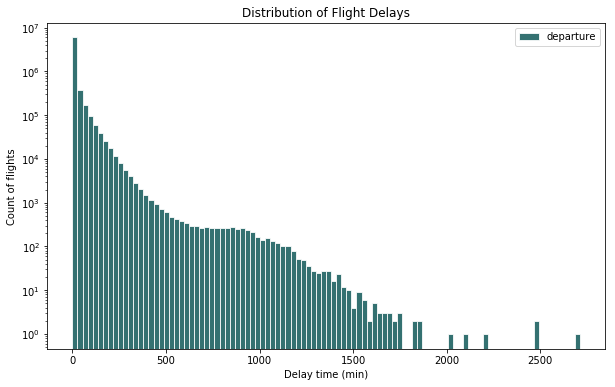

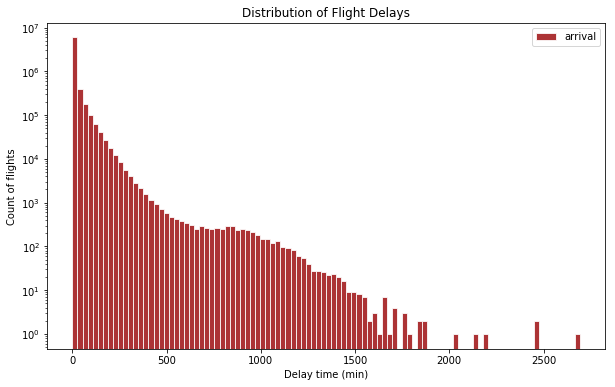

In [113]:
plt.figure(figsize=(10,6))
grid = sns.distplot(flights_df['DEP_DELAY_NEW'], kde=False, bins=100, color=sns.xkcd_rgb['dark teal'], 
                    hist_kws={'edgecolor':'white', 'log':True, 'alpha':0.8}, label='departure')
grid.set_title('Distribution of Flight Delays')
grid.set_ylabel('Count of flights')
grid.set_xlabel('Delay time (min)')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
grid = sns.distplot(flights_df['ARR_DELAY_NEW'], kde=False, bins=100, color=sns.xkcd_rgb['blood red'], 
                    hist_kws={'edgecolor':'white', 'log':True, 'alpha':0.8}, label='arrival')
grid.set_title('Distribution of Flight Delays')
grid.set_ylabel('Count of flights')
grid.set_xlabel('Delay time (min)')
plt.legend()
plt.show()

In [28]:
delay_bins = pd.cut(flights_df.ARR_DELAY_NEW, [-1, 0, 5, 10, 20, 30, 60, 120, 240, 3000]
                   ).value_counts().sort_index()
delay_bins

(-1, 0]        4450532
(0, 5]          525212
(5, 10]         362065
(10, 20]        442546
(20, 30]        254848
(30, 60]        367543
(60, 120]       255299
(120, 240]      124311
(240, 3000]      35039
Name: ARR_DELAY_NEW, dtype: int64

In [29]:
flights_df.shape[0]

6817395

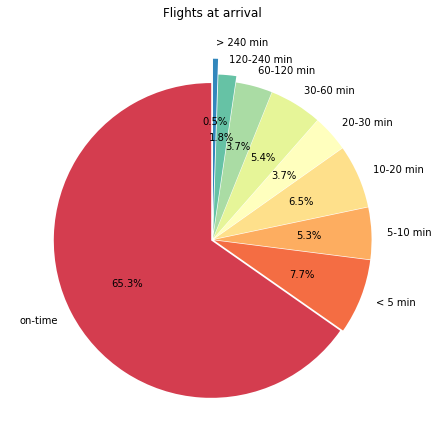

In [30]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0.1, 1, 10)]
labels = ['on-time', '< 5 min', '5-10 min', '10-20 min', '20-30 min', '30-60 min', '60-120 min', '120-240 min', '> 240 min']
explodeTuple = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.05, 0.15)

grid = delay_bins.plot.pie(y=delay_bins.index, startangle=90, labels=labels,
                           autopct='%1.1f%%', colors=colors, explode=explodeTuple)
grid.axis('equal')
grid.yaxis.set_label_text('')
grid.set_title('Flights at arrival', y=1.05)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.tight_layout()
plt.show()

Most of flights arrived on time. From those that arrived late, 56.2% were delayed by 20 min or less and 0.5% were delayed by more than 4h. Could them be considered outliers?

------
------

* ##### Converting CRS_DEP_TIME and CRS_ARR_TIME to time

In [31]:
# Converting CRS_DEP_TIME and CRS_ARR_TIME to time

def time_in_hour(df):
    df[['CRS_DEP_TIME', 'CRS_ARR_TIME']] = df[['CRS_DEP_TIME', 'CRS_ARR_TIME']].astype(str)
    df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].str.replace('2400', '0000', regex=False)
    df['CRS_ARR_TIME'] = df['CRS_ARR_TIME'].str.replace('2400', '0000', regex=False)
    df['CRS_DEP_TIME'] = df.CRS_DEP_TIME.str.zfill(4)
    df['CRS_ARR_TIME'] = df.CRS_ARR_TIME.str.zfill(4)   
    
    df['SCHEDULED_DEP'] = pd.to_datetime(df.CRS_DEP_TIME, format='%H%M').dt.time
    df['SCHEDULED_DEP'] = pd.to_timedelta(df['SCHEDULED_DEP'].astype(str))
    df['SCHEDULED_ARR'] = pd.to_datetime(df.CRS_ARR_TIME, format='%H%M').dt.time
    df['SCHEDULED_ARR'] = pd.to_timedelta(df['SCHEDULED_ARR'].astype(str))

In [32]:
time_in_hour(flights_df)

In [33]:
flights_df.sample(10)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,SCHEDULED_DEP,SCHEDULED_ARR
6155263,2018,9,18,2,WN,1283,SAN,"San Diego, CA",California,OAK,"Oakland, CA",California,0825,0.0,1000,0.0,0,0,95.0,446,08:25:00,10:00:00
1952883,2018,2,9,5,OO,4563,BIS,"Bismarck/Mandan, ND",North Dakota,MSP,"Minneapolis, MN",Minnesota,1332,0.0,1507,0.0,0,0,95.0,386,13:32:00,15:07:00
1483684,2018,1,9,2,DL,1578,DCA,"Washington, DC",Virginia,MSP,"Minneapolis, MN",Minnesota,1700,26.0,1855,26.0,0,0,175.0,931,17:00:00,18:55:00
3871553,2018,6,18,1,HA,278,HNL,"Honolulu, HI",Hawaii,KOA,"Kona, HI",Hawaii,1648,0.0,1737,0.0,0,0,49.0,163,16:48:00,17:37:00
1569313,2018,2,23,5,YV,5840,MAF,"Midland/Odessa, TX",Texas,PHX,"Phoenix, AZ",Arizona,1300,50.0,1358,44.0,0,0,118.0,581,13:00:00,13:58:00
1195120,2018,1,1,1,WN,1473,PDX,"Portland, OR",Oregon,SFO,"San Francisco, CA",California,0535,0.0,0725,0.0,0,0,110.0,550,05:35:00,07:25:00
2556405,2018,3,24,6,B6,719,JFK,"New York, NY",New York,ATL,"Atlanta, GA",Georgia,1451,17.0,1724,4.0,0,0,153.0,760,14:51:00,17:24:00
4957089,2018,7,31,2,DL,1832,ATL,"Atlanta, GA",Georgia,DAL,"Dallas, TX",Texas,2125,218.0,2240,201.0,0,0,135.0,721,21:25:00,22:40:00
551026,2017,12,24,7,AA,1811,MIA,"Miami, FL",Florida,DCA,"Washington, DC",Virginia,1210,0.0,1443,0.0,0,0,153.0,919,12:10:00,14:43:00
4380823,2018,6,9,6,DL,2596,LAX,"Los Angeles, CA",California,SEA,"Seattle, WA",Washington,1440,0.0,1720,0.0,0,0,160.0,954,14:40:00,17:20:00


In [34]:
# features control
flights_FeatCtrl['CRS_DEP_TIME'] = 2
flights_FeatCtrl['CRS_ARR_TIME'] = 2
flights_FeatCtrl['SCHEDULED_DEP'] = 3
flights_FeatCtrl['SCHEDULED_ARR'] = 3

----------
----------
* ##### CRS_ELAPSED_TIME negative values

In [35]:
#The shortest commercial flight in US lasts 16 min
flights_df[flights_df.CRS_ELAPSED_TIME <= 15]

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,SCHEDULED_DEP,SCHEDULED_ARR
3943001,2018,6,2,6,OO,5132,SLN,"Salina, KS",Kansas,HYS,"Hays, KS",Kansas,1710,0.0,1715,16.0,0,0,5.0,88,17:10:00,17:15:00
4621219,2018,7,10,2,YV,5903,MTJ,"Montrose/Delta, CO",Colorado,DFW,"Dallas/Fort Worth, TX",Texas,1227,13.0,1328,194.0,0,0,1.0,722,12:27:00,13:28:00
4977069,2018,7,4,3,YX,4493,MSP,"Minneapolis, MN",Minnesota,LGA,"New York, NY",New York,0709,43.0,0810,216.0,0,0,1.0,1020,07:09:00,08:10:00
5245848,2018,8,19,7,OH,5123,CLT,"Charlotte, NC",North Carolina,PGV,"Greenville, NC",North Carolina,2225,24.0,2226,89.0,0,0,1.0,203,22:25:00,22:26:00
6577867,2018,10,9,2,YX,3534,ORD,"Chicago, IL",Illinois,TVC,"Traverse City, MI",Michigan,2120,524.0,2336,508.0,0,0,-99.0,224,21:20:00,23:36:00


----
----
It seems that there are a few wrong values for CRS_ELAPSED_TIME. CRS_DEP_TIME and/or CRS_ARR_TIME also have values that do not make sense. Some even don't match with the details of the same flights on other dates. I'm dropping these outliers.

----
----

In [36]:
# keeping only data with CRS_ELAPSED_TIME values higher than 15 min
flights_df = flights_df[flights_df.CRS_ELAPSED_TIME >= 15]

-----
-----
* #### DISTANCE minimum value

In [37]:
flights_df[flights_df.DISTANCE == 31].describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,DEP_DELAY_NEW,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,SCHEDULED_DEP,SCHEDULED_ARR
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.0,712.0,712.000000,712.0,712,712
mean,2017.838483,6.536517,15.748596,4.000000,64.497191,4.657303,5.405899,0.0,0.0,22.495787,31.0,0 days 13:00:10.786516,0 days 13:22:40.533707
std,0.368266,3.406177,8.772640,1.997185,0.500344,16.242812,16.921914,0.0,0.0,1.329101,0.0,0 days 02:11:56.709771,0 days 02:12:02.758135
min,2017.000000,1.000000,1.000000,1.000000,64.000000,0.000000,0.000000,0.0,0.0,20.000000,31.0,0 days 10:30:00,0 days 10:51:00
25%,2018.000000,4.000000,8.000000,2.000000,64.000000,0.000000,0.000000,0.0,0.0,21.000000,31.0,0 days 10:55:00,0 days 11:17:00
50%,2018.000000,7.000000,16.000000,4.000000,64.000000,0.000000,0.000000,0.0,0.0,22.000000,31.0,0 days 14:57:00,0 days 15:19:00
75%,2018.000000,9.000000,23.000000,6.000000,65.000000,0.000000,0.000000,0.0,0.0,23.000000,31.0,0 days 15:14:00,0 days 15:37:00
max,2018.000000,12.000000,31.000000,7.000000,65.000000,150.000000,153.000000,0.0,0.0,26.000000,31.0,0 days 15:29:00,0 days 15:50:00


-----
-----
Apparently there are flights between airports in Alaska that are 31 miles away. So it is a correct value.

---------
---------
## 3. Spliting training-test set

Before further inspecting the data closely, we need to split it into training and test set.
The *flights_df* dataset is not homogeneous. Almost 66% of the data is of flights that arrived on time. From the 34.7% of flights that were delayed, almost 67% were 30 min or less late. We need to make sure that both test and training sets are similar and homogeneous regarding delays-time. Therefore we can split the dataset using the Scikit-Learn's *StratifiedShuffleSplit* class.

The dataset is expressed as a fraction of month, day and airline, so in order to make training and test set more homogeneous, we also need to suffle the data (StratifiedShuffleSplit will do it automatically). It will also enhance the robustness of the cross validation as all cross-validation folds later will be similar.

Let us divide the *ARR_DELAY_NEW* into bins based on delay-time like we did previously:

In [38]:
delay_bins = pd.cut(flights_df.ARR_DELAY_NEW, [-1, 0, 15, 30, 60, 120, 3000]).value_counts().sort_index()
delay_bins / len(flights_df) * 100

(-1, 0]        65.282051
(0, 15]        16.763982
(15, 30]        6.480545
(30, 60]        5.391257
(60, 120]       3.744806
(120, 3000]     2.337361
Name: ARR_DELAY_NEW, dtype: float64

In [167]:
#binning delays by time

def delay_binning(df):
    df['BIN_DEP_DELAY'] = pd.cut(df['DEP_DELAY_NEW'], [-1, 0, 15, 30, 60, 120, 3000], 
                                 labels = ['on-time', '< 15 min', '15-30 min', '30-60 min','60-120 min', '> 120 min'])
    df['BIN_ARR_DELAY'] = pd.cut(df['ARR_DELAY_NEW'], [-1, 0, 15, 30, 60, 120, 3000], 
                                 labels = ['on-time', '< 15 min', '15-30 min', '30-60 min','60-120 min', '> 120 min'])
    
    flights_FeatCtrl['BIN_DEP_DELAY'] = 4
    flights_FeatCtrl['BIN_ARR_DELAY'] = 2
    flights_FeatCtrl['DEP_DELAY_NEW'] = 5
    flights_FeatCtrl['ARR_DELAY_NEW'] = 1
    return df.sample(5)


In [168]:
delay_binning(flights_df)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,SCHEDULED_DEP,SCHEDULED_ARR,BIN_DEP_DELAY,BIN_ARR_DELAY
6196118,2018,9,29,6,UA,905,BUF,"Buffalo, NY",New York,ORD,"Chicago, IL",Illinois,0815,0.0,0912,0.0,0,0,117.0,474,08:15:00,09:12:00,on-time,on-time
3723991,2018,5,21,1,AS,737,BOS,"Boston, MA",Massachusetts,SEA,"Seattle, WA",Washington,0914,0.0,1221,0.0,0,0,367.0,2496,09:14:00,12:21:00,on-time,on-time
1979754,2018,3,31,6,F9,1145,SAT,"San Antonio, TX",Texas,LAS,"Las Vegas, NV",Nevada,2138,0.0,2235,0.0,0,0,177.0,1069,21:38:00,22:35:00,on-time,on-time
6371357,2018,10,7,7,OO,3333,DCA,"Washington, DC",Virginia,DAL,"Dallas, TX",Texas,1145,0.0,1358,5.0,0,0,193.0,1184,11:45:00,13:58:00,on-time,< 15 min
2181310,2018,3,16,5,WN,991,FLL,"Fort Lauderdale, FL",Florida,MCI,"Kansas City, MO",Missouri,1635,17.0,1900,16.0,0,0,205.0,1242,16:35:00,19:00:00,15-30 min,15-30 min


In [41]:
# Spliting data into training and test sets
def train_test_split(df):
    df.reset_index(drop=True, inplace=True)
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=87)
    for train_index, test_index in split.split(df, df['BIN_ARR_DELAY']):
        train = df.loc[train_index]
        test = df.loc[test_index]
        
    print('Training shape:', train.shape)
    print('Test set shape:', test.shape)
    return (train, test)

In [42]:
flights_train, flights_test = train_test_split(flights_df)

Training shape: (5113042, 24)
Test set shape: (1704348, 24)


In [43]:
#cheking whether stratification worked when spliting into training-test sets
flights_df_bin = flights_df['BIN_ARR_DELAY'].value_counts() / len(flights_df)*100
flights_train_bin = flights_train['BIN_ARR_DELAY'].value_counts() / len(flights_train)*100
flights_test_bin = flights_test['BIN_ARR_DELAY'].value_counts() / len(flights_test)*100

bins_percentage = pd.concat([flights_df_bin, flights_train_bin, flights_test_bin], axis=1, 
                            keys=['original_df','training_set', 'test_set'], join='outer', sort=True)
bins_percentage

,original_df,training_set,test_set
on-time,65.282051,65.282057,65.282032
< 15 min,16.763982,16.763973,16.764006
15-30 min,6.480545,6.480545,6.480543
30-60 min,5.391257,5.391252,5.391270
60-120 min,3.744806,3.744816,3.744775
> 120 min,2.337361,2.337356,2.337375


-------------------
-------------------
## 4. Exploratory data analysis

Now that we had our dataset split, we can explore the data a little bit more in depth. To make manipulation easy and fast, let's sample a smaller exploratory set first.

In [44]:
# sampling an exploratory set of 500k training examples
train_explor = flights_train.sample(500000, random_state=87)

In [45]:
train_explor_bin = train_explor['BIN_ARR_DELAY'].value_counts() / len(train_explor)*100

pd.concat([flights_train_bin, train_explor_bin], axis=1, keys=['training_set', 'exploring_set'], join='outer', sort=True)

,training_set,exploring_set
on-time,65.282057,65.2122
< 15 min,16.763973,16.7422
15-30 min,6.480545,6.4996
30-60 min,5.391252,5.4044
60-120 min,3.744816,3.7772
> 120 min,2.337356,2.3644


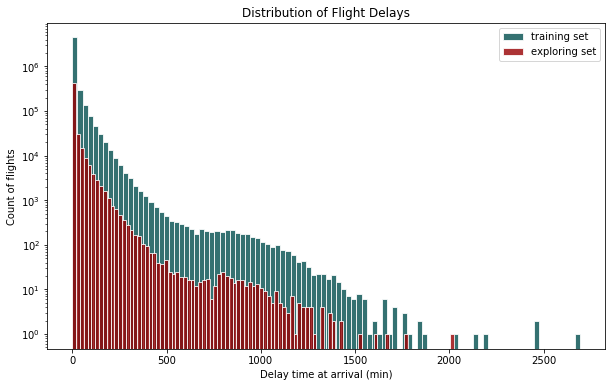

In [109]:
plt.figure(figsize=(10,6))
grid = sns.distplot(flights_train['ARR_DELAY_NEW'], kde=False, bins=100, color=sns.xkcd_rgb['dark teal'], 
                    hist_kws={'edgecolor':'white', 'log':True, 'alpha':0.8}, label='training set')
grid = sns.distplot(train_explor['ARR_DELAY_NEW'], kde=False, bins=100, color=sns.xkcd_rgb['blood red'], 
                    hist_kws={'edgecolor':'white', 'log':True, 'alpha':0.8}, label='exploring set')
grid.set_title('Distribution of Flight Delays')
grid.set_ylabel('Count of flights')
grid.set_xlabel('Delay time at arrival (min)')
plt.legend()
plt.show()

-------
-------
It seems that the exploratory set is similar enough to the training set.

Flights there were delayed by more than 4h count for approximately 0.5% of all domestic flights in the US. Such delays are not that recurrent and and may be due to "extraordinary circumstances". I would say they are often beyond the airlines control and are hard to predict. Let's make sure these outliers are not "hidding" any information and if they're not, they might be droped. 

--------
--------

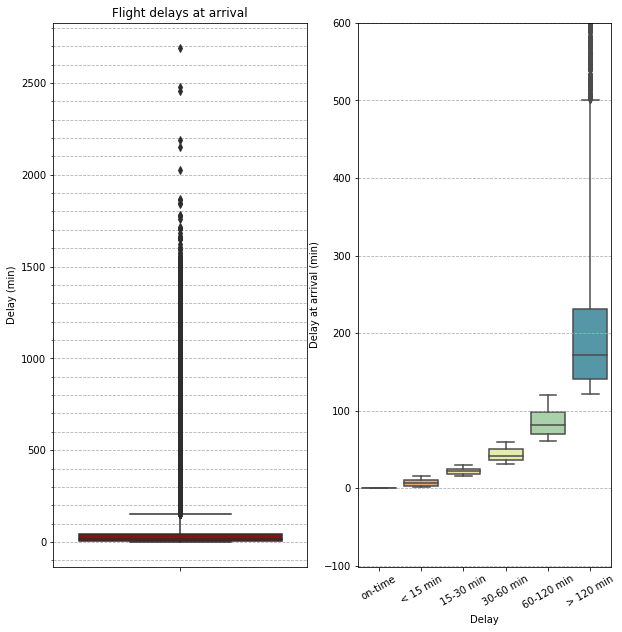

In [119]:
plt.figure(figsize=(10,10))
plt.subplot(121)
delays = flights_df[flights_df.ARR_DELAY_NEW > 0]
grid = sns.boxplot(y='ARR_DELAY_NEW', data=delays, color=sns.xkcd_rgb['blood red'], whis=3, zorder=2)
grid.minorticks_on()
grid.yaxis.grid( which='both', linestyle='--')
grid.set_title('Flight delays at arrival')
grid.set_ylabel('Delay (min)')

plt.subplot(122)
grid = sns.boxplot(x='BIN_ARR_DELAY', y='ARR_DELAY_NEW', data=train_explor, palette=sns.color_palette("Spectral",6),
                   whis=3, zorder=2)
grid.yaxis.grid( which='both', linestyle='--')
grid.set_xlabel('Delay')
grid.set_ylabel('Delay at arrival (min)')
plt.xticks(rotation=30)
plt.ylim(None,600)
plt.show()

-----
-----
* ### The impact of time of the year on arrival delays

In [48]:
# Calculating the frequency of delays per month. But, the number of flights per month is different, so we can not just count 
# the number of delays per month, but we need to use the percentage of delays per month to make data comparable between months 
# instead, otherwise it could be misleading.

delays_count_month = train_explor[['MONTH', 'BIN_ARR_DELAY', 'ARR_DELAY_NEW']] \
                            .groupby(['MONTH', 'BIN_ARR_DELAY']).agg('count').rename(columns={'ARR_DELAY_NEW': 'count'})
delay_per_month = delays_count_month.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())) \
                            .rename(columns={'count': 'frequency'})

In [49]:
# probability of delays by month (only delayed flights)
delays_df = train_explor[train_explor.ARR_DELAY_NEW > 0]

only_delays_count_month = delays_df[['MONTH', 'BIN_ARR_DELAY', 'ARR_DELAY_NEW']] \
                            .groupby(['MONTH', 'BIN_ARR_DELAY']).agg('count').rename(columns={'ARR_DELAY_NEW': 'count'})
only_delay_per_month = only_delays_count_month.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())) \
                            .rename(columns={'count': 'frequency'})

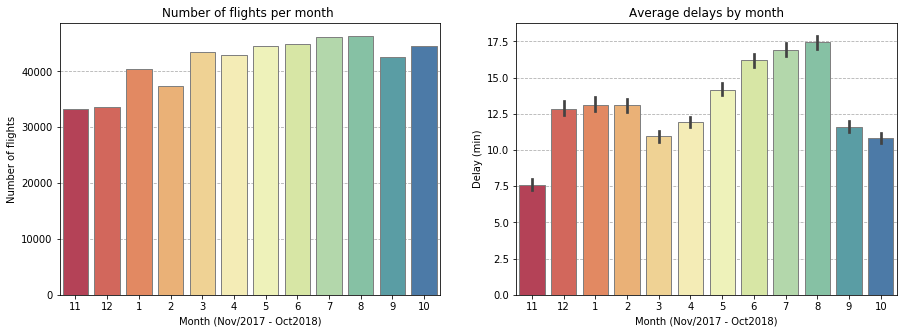

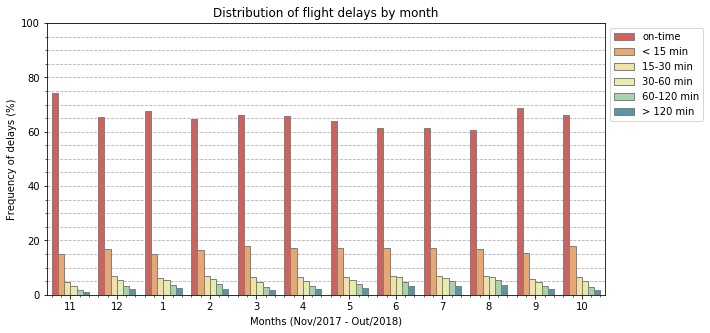

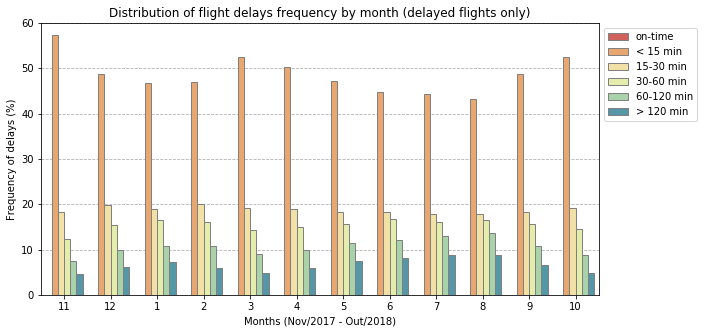

In [50]:
#----- total number of flights per month -----
plt.figure(figsize=(15,5))
plt.subplot(121)
grid = sns.countplot(x='MONTH', data=train_explor, palette=sns.color_palette("Spectral",12), 
                     edgecolor = 'grey', order=[11,12,1,2,3,4,5,6,7,8,9,10], zorder=2)
grid.set_title('Number of flights per month ')
grid.set_ylabel('Number of flights')
grid.set_xlabel('Month (Nov/2017 - Oct2018)')
grid.yaxis.grid( which='both', linestyle='--')


#----- average delays at arrival by month -----
plt.subplot(122)
grid = sns.barplot(x='MONTH', y='ARR_DELAY_NEW', data=train_explor,
                   palette=sns.color_palette("Spectral", 12), edgecolor = 'grey', order=[11,12,1,2,3,4,5,6,7,8,9,10], zorder=2)
grid.set_title('Average delays by month')
grid.set_ylabel('Delay (min)')
grid.set_xlabel('Month (Nov/2017 - Oct2018)')
grid.yaxis.grid(which='both', linestyle='--')
plt.show()


#----- Distribution of delays frequency by month (binned) -----
plt.figure(figsize=(10,5))
grid = sns.barplot(x='MONTH', y='frequency', hue='BIN_ARR_DELAY', data=delay_per_month.reset_index(), 
                   palette=sns.color_palette("Spectral",6), edgecolor = 'grey', order=[11,12,1,2,3,4,5,6,7,8,9,10], 
                   zorder=2)
plt.legend(bbox_to_anchor=(1.0, 1), loc=2)
grid.set_title('Distribution of flight delays by month')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Months (Nov/2017 - Out/2018)')
grid.yaxis.grid( which='both', linestyle='--')
plt.ylim(0, 100)
grid.minorticks_on()
plt.show()


#----- Distribution of delays frequency by month (delayed flights only, binned) -----
plt.figure(figsize=(10,5))
grid = sns.barplot(x='MONTH', y='frequency', hue='BIN_ARR_DELAY', data=only_delay_per_month.reset_index(), 
                   palette=sns.color_palette("Spectral",6), edgecolor = 'grey', order=[11,12,1,2,3,4,5,6,7,8,9,10], 
                   zorder=2)
plt.legend(bbox_to_anchor=(1.0, 1), loc=2)
grid.set_title('Distribution of flight delays frequency by month (delayed flights only)')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Months (Nov/2017 - Out/2018)')
grid.yaxis.grid( which='both', linestyle='--')
plt.ylim(0, 60)
plt.show()

The number of flights varied from month to month during the period from November 2017 to October 2018 and reached its maximum during the summer season. On an annual average, approximately 65% of flights arrived on-time and almost 15% delayed up to 15 min.
But when we look at months separately, the statistics show that the warmer months June, July and August were below the annual average for punctuality. During the warmer months around 60% of flights arrived on time and delays over 15 min on average could be expected, with a higher probability of even longer delays. On the other hand, almost 74% of flights arrived on-time on November and less then 2% of flights delayed more than 60 min.

We may consider binning months into seasons e test its effect on model performance.

-----
-----

In [169]:
# binning month into seasons
for df in [flights_train, train_explor, flights_test]:
    df['BIN_MONTH'] = np.where((df.MONTH == 12) | (df.MONTH == 1) | (df.MONTH == 2), 
                                      'Winter',
                                      np.where((df.MONTH == 3) | (df.MONTH == 4) | (df.MONTH == 5),
                                      'Spring',
                                      np.where((df.MONTH == 6) | (df.MONTH == 7) | (df.MONTH == 8),
                                      'Summer', 'Autumn')))

# updating feature control df
flights_FeatCtrl['BIN_MONTH'] = 4
flights_FeatCtrl['MONTH'] = 5

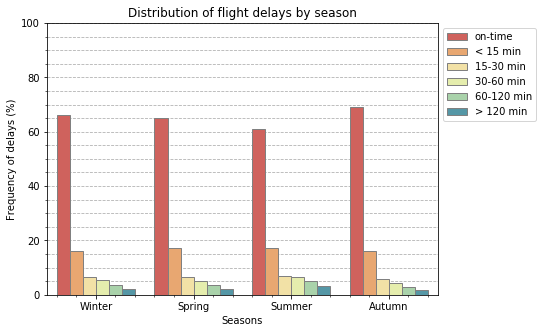

In [52]:
delays_count_season = train_explor[['BIN_MONTH', 'BIN_ARR_DELAY', 'ARR_DELAY_NEW']] \
                            .groupby(['BIN_MONTH', 'BIN_ARR_DELAY']).agg('count').rename(columns={'ARR_DELAY_NEW': 'count'})

delay_per_season = delays_count_season.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())) \
                            .rename(columns={'count': 'frequency'})

plt.figure(figsize=(7,5))
grid = sns.barplot(x='BIN_MONTH', y='frequency', hue='BIN_ARR_DELAY', data=delay_per_season.reset_index(), 
                   palette=sns.color_palette("Spectral",6), edgecolor = 'grey', zorder=2,
                   order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.legend(bbox_to_anchor=(1.0, 1), loc=2)
grid.set_title('Distribution of flight delays by season')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Seasons')
grid.yaxis.grid( which='both', linestyle='--')
plt.ylim(0, 100)
grid.minorticks_on()
plt.show()

-----
-----
* ### The impact of weekdays on arrival delays

In [53]:
# Calulating the percentage of delays by weekday to make data comparable between weekdays
delays_count_week = train_explor[['DAY_OF_WEEK', 'BIN_ARR_DELAY', 'ARR_DELAY_NEW']] \
                        .groupby(['DAY_OF_WEEK', 'BIN_ARR_DELAY']).agg('count').rename(columns={'ARR_DELAY_NEW': 'count'})

delay_per_week = delays_count_week.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())) \
                        .rename(columns={'count': 'frequency'})

#only delayed flights
only_delays_count_week = delays_df[['DAY_OF_WEEK', 'BIN_ARR_DELAY', 'ARR_DELAY_NEW']] \
                        .groupby(['DAY_OF_WEEK','BIN_ARR_DELAY']).agg('count').rename(columns={'ARR_DELAY_NEW': 'count'})

only_delay_per_week = only_delays_count_week.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())) \
                        .rename(columns={'count': 'frequency'})

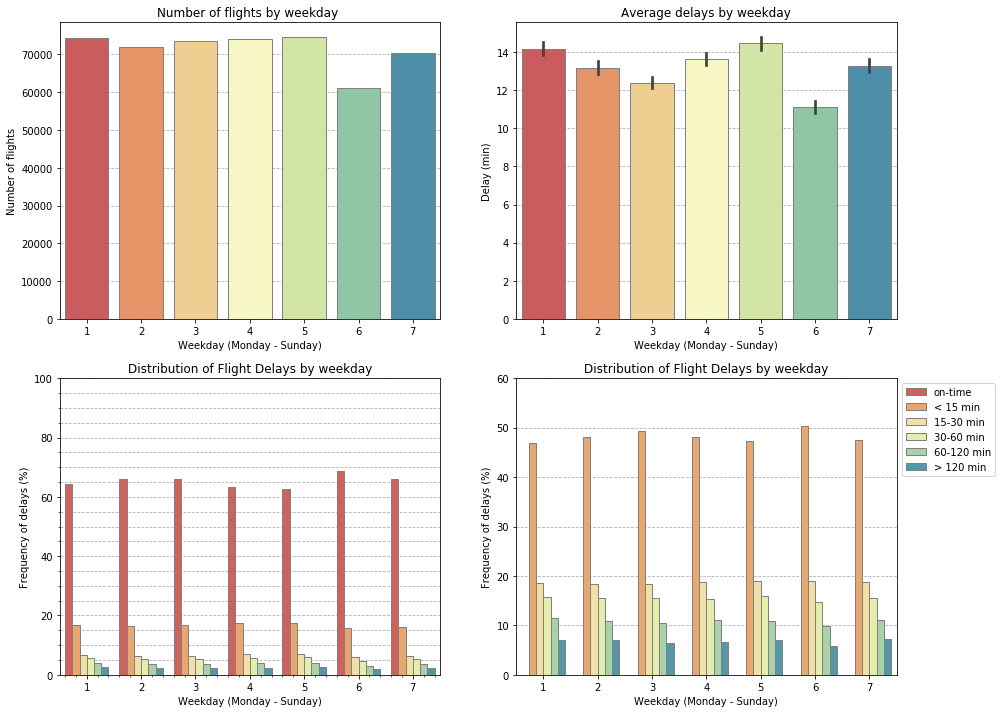

In [54]:
#----- Total number of flights by weekday -----
plt.figure(figsize=(15,12))
plt.subplot(221)
grid = sns.countplot(x='DAY_OF_WEEK', data=train_explor, palette=sns.color_palette("Spectral",7), 
                     edgecolor = 'grey', order=[1,2,3,4,5,6,7], zorder=2)
grid.set_title('Number of flights by weekday ')
grid.set_ylabel('Number of flights')
grid.set_xlabel('Weekday (Monday - Sunday)')
grid.yaxis.grid( which='both', linestyle='--')


#----- average delays at arrival by weekday -----
plt.subplot(222)
grid = sns.barplot(x='DAY_OF_WEEK', y='ARR_DELAY_NEW', data=train_explor,
                   palette=sns.color_palette("Spectral", 7), edgecolor = 'grey', order=[1,2,3,4,5,6,7], zorder=2)
grid.set_title('Average delays by weekday')
grid.set_ylabel('Delay (min)')
grid.set_xlabel('Weekday (Monday - Sunday)')
grid.yaxis.grid(which='both', linestyle='--')


#----- Distribution of delays by weekday (binned) -----
plt.subplot(223)
grid = sns.barplot(x='DAY_OF_WEEK', y='frequency', hue='BIN_ARR_DELAY', data=delay_per_week.reset_index(), 
                   palette=sns.color_palette("Spectral",6), edgecolor = 'grey', order=[1,2,3,4,5,6,7], zorder=2)
grid.legend_.remove()
grid.set_title('Distribution of Flight Delays by weekday')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Weekday (Monday - Sunday)')
grid.yaxis.grid( which='both', linestyle='--')
grid.minorticks_on()
plt.ylim(0, 100)


#----- Distribution of delays per weekday (delayed flights only, binned) -----
plt.subplot(224)
grid = sns.barplot(x='DAY_OF_WEEK', y='frequency', hue='BIN_ARR_DELAY', data=only_delay_per_week.reset_index(), 
                   palette=sns.color_palette("Spectral",6), edgecolor = 'grey', order=[1,2,3,4,5,6,7], zorder=2)
plt.legend(bbox_to_anchor=(1.0, 1), loc=2)
grid.set_title('Distribution of Flight Delays by weekday')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Weekday (Monday - Sunday)')
grid.yaxis.grid( which='both', linestyle='--')
plt.ylim(0, 60)
plt.show()

Weekdays were busier than weekends, being Mondays, Thursdays and Fridays more prone to delays, with more than 36% of flights delaying. It seems that on Saturdays, on the other hand, flights ran more on schedule, with almost 70% of them arriving on-time and an average delay of 11 min (against 14 min or more on Mondays and Fridays).

----
----

* ### Comparing airlines by arrival delays

In [55]:
# importing Airlines dataset with code and name of Airlines
airlines = pd.read_csv('./CSV_files/Airlines.csv')
airlines.sample(5)

,Code,Description
1437,TEQ,Transp. Aereos Ejecutivos (1990 - 1993)
1524,VAG,Vagabond Aviation Inc. (1960 - 2002)
1195,PRD,Paradise Island Airlines (1991 - 2002)
647,EY,Etihad Airways (2006 - )
23,0VQ,Ocean Sky (UK) Limited (2009 - )


In [56]:
# removing the year of operation of airlines information within ()
airlines['Description'] = airlines['Description'].str.replace(r"\(.*\)","")
airlines.sample(5)

,Code,Description
1435,TE,Air New Zealand
1495,TZQ,First Choice Airways
967,MAA,Maui Airlines
1351,SKW,Skyway Airlines
1665,XDC,Hemisphere Air Charter


In [57]:
# Merging train_explor and airlines datasets
train_explor = pd.merge(train_explor, airlines, how='left', left_on='OP_CARRIER', right_on='Code')
train_explor.sample(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,SCHEDULED_DEP,SCHEDULED_ARR,BIN_DEP_DELAY,BIN_ARR_DELAY,BIN_MONTH,Code,Description
149935,2017,11,27,1,AA,614,PHX,"Phoenix, AZ",Arizona,DSM,"Des Moines, IA",Iowa,1959,0.0,2338,0.0,0,0,159.0,1149,19:59:00,23:38:00,on-time,on-time,Autumn,AA,American Airlines Inc.
49689,2018,4,20,5,EV,4106,CLE,"Cleveland, OH",Ohio,LGA,"New York, NY",New York,1550,96.0,1732,80.0,0,0,102.0,419,15:50:00,17:32:00,60-120 min,60-120 min,Spring,EV,ExpressJet Airlines Inc.
181012,2018,4,4,3,OO,5747,STL,"St. Louis, MO",Missouri,ORD,"Chicago, IL",Illinois,1330,0.0,1451,1.0,0,0,81.0,258,13:30:00,14:51:00,on-time,< 15 min,Spring,OO,SkyWest Airlines Inc.
195356,2018,3,28,3,WN,1509,BNA,"Nashville, TN",Tennessee,BOS,"Boston, MA",Massachusetts,1435,16.0,1805,0.0,0,0,150.0,942,14:35:00,18:05:00,15-30 min,on-time,Spring,WN,Southwest Airlines Co.
193762,2017,11,3,5,WN,142,PHX,"Phoenix, AZ",Arizona,SAN,"San Diego, CA",California,0805,3.0,0920,0.0,0,0,75.0,304,08:05:00,09:20:00,< 15 min,on-time,Autumn,WN,Southwest Airlines Co.


In [58]:
train_explor.drop('Code', axis=1, inplace=True)
train_explor.rename(columns={'Description': 'AIRLINE'}, inplace=True)
train_explor.sample(1)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,SCHEDULED_DEP,SCHEDULED_ARR,BIN_DEP_DELAY,BIN_ARR_DELAY,BIN_MONTH,AIRLINE
340879,2018,5,15,2,NK,468,LAS,"Las Vegas, NV",Nevada,MSY,"New Orleans, LA",Louisiana,1950,218.0,0106,206.0,0,0,196.0,1500,19:50:00,01:06:00,> 120 min,> 120 min,Spring,Spirit Air Lines


In [59]:
# Normalizing to percentage of delays per airline to make data more comparable between them

delays_count_airline = train_explor[['AIRLINE', 'BIN_ARR_DELAY', 'ARR_DELAY_NEW']] \
                            .groupby(['AIRLINE', 'BIN_ARR_DELAY']).agg('count').rename(columns={'ARR_DELAY_NEW': 'count'})

delay_per_airline = delays_count_airline.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())) \
                            .rename(columns={'count': 'frequency'})

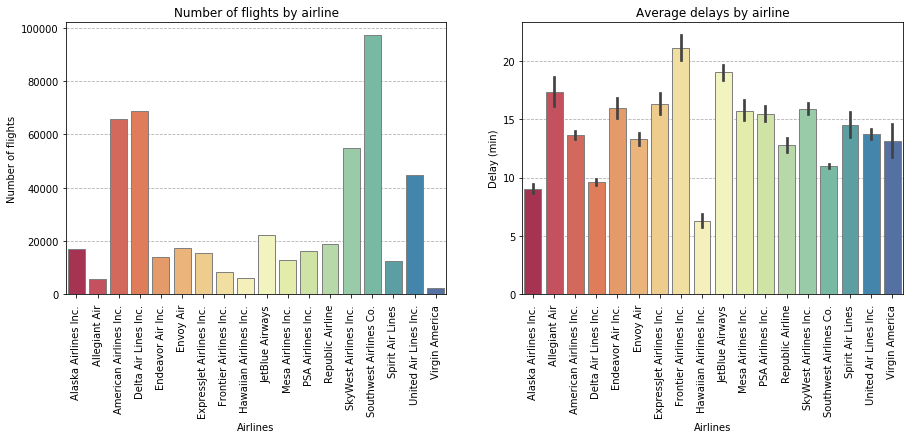

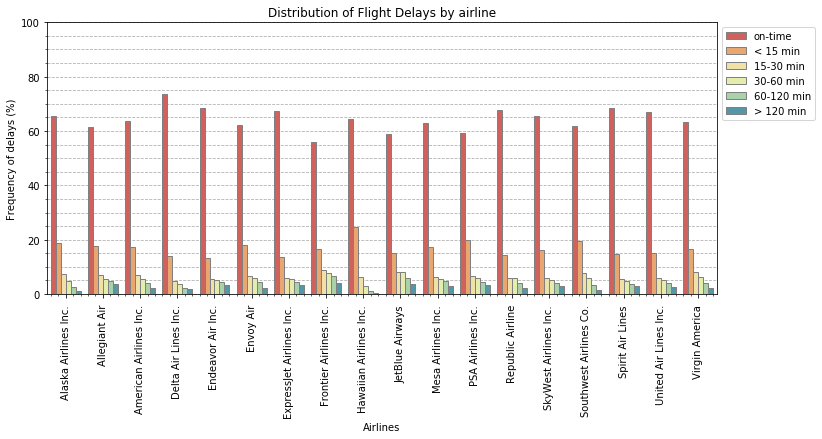

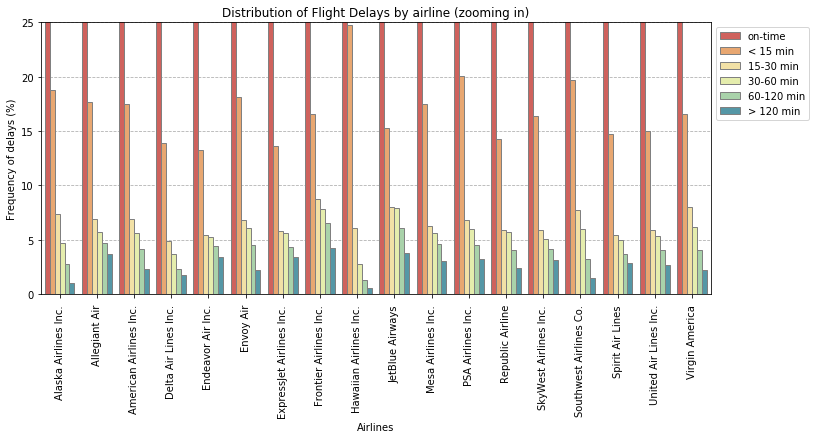

In [60]:
#----- total number of flights by airline -----
plt.figure(figsize=(15,5))
plt.subplot(121)
grid = sns.countplot(x='AIRLINE', data=train_explor, palette=sns.color_palette("Spectral",18), 
                     edgecolor = 'grey', zorder=2, order=np.sort(train_explor['AIRLINE'].unique()))
grid.set_title('Number of flights by airline')
grid.set_ylabel('Number of flights')
grid.set_xlabel('Airlines')
grid.yaxis.grid( which='both', linestyle='--')
plt.xticks(rotation=90)


#----- average delays at arrival by airline -----
plt.subplot(122)
grid = sns.barplot(x='AIRLINE', y='ARR_DELAY_NEW', data=train_explor, palette=sns.color_palette("Spectral", 18), 
                   edgecolor = 'grey', zorder=2, order=np.sort(train_explor['AIRLINE'].unique()))
grid.set_title('Average delays by airline')
grid.set_ylabel('Delay (min)')
grid.set_xlabel('Airlines')
grid.yaxis.grid(which='both', linestyle='--')
plt.xticks(rotation=90)
plt.show()


#----- Distribution of delays frequency by airline (binned) -----
plt.figure(figsize=(12,5))
grid = sns.barplot(x='AIRLINE', y='frequency', hue='BIN_ARR_DELAY', data=delay_per_airline.reset_index(), 
                   palette=sns.color_palette("Spectral", 6), edgecolor = 'grey', zorder=2)
plt.legend(bbox_to_anchor=(1.0, 1), loc=2)
grid.set_title('Distribution of Flight Delays by airline')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Airlines')
grid.yaxis.grid(which='both', linestyle='--')
plt.xticks(rotation=90)
plt.ylim(0, 100)
grid.minorticks_on()
plt.show()


#----- Distribution of delays frequency by airline (zooming in, binned) -----
plt.figure(figsize=(12,5))
grid = sns.barplot(x='AIRLINE', y='frequency', hue='BIN_ARR_DELAY', data=delay_per_airline.reset_index(), 
                   palette=sns.color_palette("Spectral", 6), edgecolor = 'grey', zorder=2)
plt.legend(bbox_to_anchor=(1.0, 1), loc=2)
grid.set_title('Distribution of Flight Delays by airline (zooming in)')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Airlines')
grid.yaxis.grid(which='both', linestyle='--')
plt.xticks(rotation=90)
plt.ylim(0, 25)
plt.show()

From the 18 airlines here depicted, Southwest Airlines, Delta Airlines, American Airlines and Skywest Airlines account together for more than 57% of all domestic flights in US. It does not seem to have a linear correlation between number of flights operated and delays, though. On average, delays at arrival over 10 min were observed for all airlines with exception of Hawaiian, Delta and Alaska Airlines, which did better. Frontier leads the list of less ponctual airline, with almost 45% of flights arriving late, followed by Jetblue with a bit more than 40%. Furthermore, both companies showed higher percentage of delays over 15 min and delays over 1h account for almost 10% of their flights. On the other hand, Delta flights arrived on scheduled on more than 75% of the time, and Hawaiian, with 65% of flights arriving in time, has an average delays of approximately 7 min and delays over 30 min accounting for less than 5% of its flights.

Apparently there is a correlation between low-costs airlines and delays. We can bin airlines into low-costs, regionals and full-servide airlines to check this hipothesis.

-----
-----

In [170]:
# binning airlines into categories
for df in [train_explor, flights_train, flights_test]:
    df['BIN_AIRLINE'] = df.OP_CARRIER.replace(['WN','B6','VX','F9','NK','G4'], 'Low_cost') \
                                     .replace(['OH','MQ','OO','EV','YX','YV','9E'], 'Regional') \
                                     .replace(['UA','HA','DL','AS','AA'], 'Full-service')

# updating feature control df
flights_FeatCtrl['BIN_AIRLINE'] = 4
flights_FeatCtrl['OP_CARRIER'] = 5

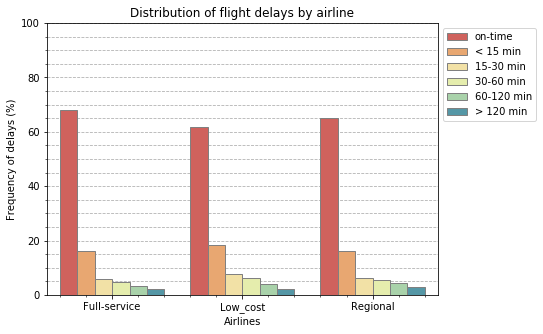

In [62]:
delays_count_airlinebin = train_explor[['BIN_AIRLINE', 'BIN_ARR_DELAY', 'ARR_DELAY_NEW']] \
                            .groupby(['BIN_AIRLINE','BIN_ARR_DELAY']).agg('count').rename(columns={'ARR_DELAY_NEW': 'count'})
delay_per_airlinebin = delays_count_airlinebin.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())) \
                            .rename(columns={'count': 'frequency'})

plt.figure(figsize=(7,5))
grid = sns.barplot(x='BIN_AIRLINE', y='frequency', hue='BIN_ARR_DELAY', data=delay_per_airlinebin.reset_index(), 
                   palette=sns.color_palette("Spectral",6), edgecolor = 'grey', zorder=2)
plt.legend(bbox_to_anchor=(1.0, 1), loc=2)
grid.set_title('Distribution of flight delays by airline')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Airlines')
grid.yaxis.grid( which='both', linestyle='--')
plt.ylim(0, 100)
grid.minorticks_on()
plt.show()

We can check later the effect of *BIN_AIRLINE* on model performance.

----
----
* ### The impact of time of the day on arrival delays

In [63]:
# extracting hour from BIN_DEP_DELAY's and BIN_ARR_DELAY's time
for df in [train_explor, flights_train, flights_test]:
    df['HOUR_SCHEDULED_DEP'] = (df.SCHEDULED_DEP.dt.floor('1h') / pd.Timedelta('1h')).astype(int)
    df['HOUR_SCHEDULED_ARR'] = (df.SCHEDULED_ARR.dt.floor('1h') / pd.Timedelta('1h')).astype(int)

In [64]:
# Normalizing to percentage of delays by hour to make data more comparable between them

delays_count_hour = train_explor[['HOUR_SCHEDULED_ARR', 'BIN_ARR_DELAY', 'ARR_DELAY_NEW']] \
                        .groupby(['HOUR_SCHEDULED_ARR', 'BIN_ARR_DELAY']).agg('count').rename(columns={'ARR_DELAY_NEW': 'count'})
delay_per_hour = delays_count_hour.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())) \
                        .rename(columns={'count': 'frequency'})

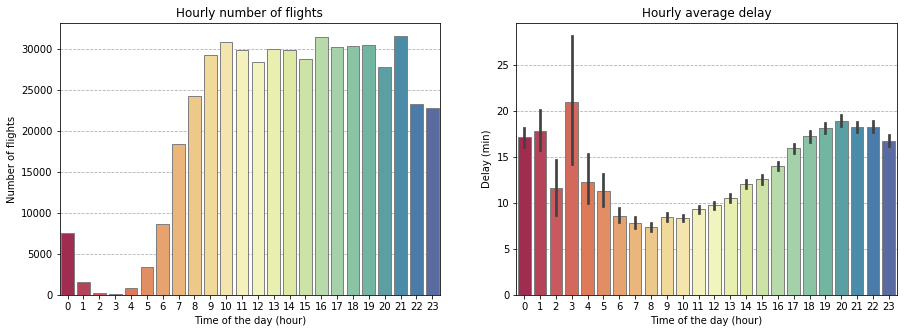

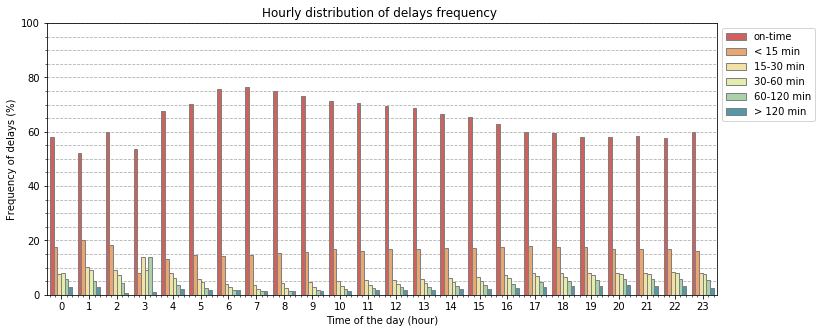

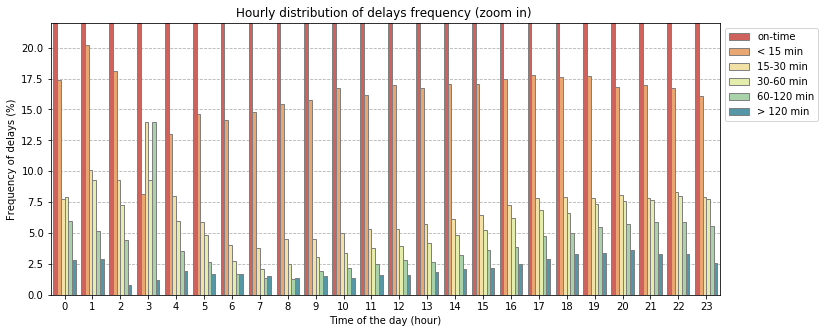

In [65]:
#----- total number of flights by hour -----
plt.figure(figsize=(15,5))
plt.subplot(121)
grid = sns.countplot(x='HOUR_SCHEDULED_ARR', data=train_explor, palette=sns.color_palette("Spectral",24), 
                     edgecolor = 'grey', zorder=2)
grid.set_title('Hourly number of flights')
grid.set_ylabel('Number of flights')
grid.set_xlabel('Time of the day (hour)')
grid.yaxis.grid( which='both', linestyle='--')


#----- average delay at arrival by hour -----
plt.subplot(122)
grid = sns.barplot(x='HOUR_SCHEDULED_ARR', y='ARR_DELAY_NEW', data=train_explor, palette=sns.color_palette('Spectral', 24),
                  edgecolor='grey', zorder=2)
grid.set_title('Hourly average delay')
grid.set_xlabel('Time of the day (hour)')
grid.set_ylabel('Delay (min)')
grid.yaxis.grid( which='both', linestyle='--')
plt.show()


#----- Distribution of delays frequency by airline (binned) -----
plt.figure(figsize=(12,5))
grid = sns.barplot(x='HOUR_SCHEDULED_ARR', y='frequency', hue='BIN_ARR_DELAY', data=delay_per_hour.reset_index(),
                   palette=sns.color_palette('Spectral', 6), edgecolor='grey', zorder=2)
plt.legend(bbox_to_anchor=(1.0, 1), loc=2)
grid.set_title('Hourly distribution of delays frequency ')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Time of the day (hour)')
grid.yaxis.grid(which='both', linestyle='--')
plt.ylim(0, 100)
grid.minorticks_on()
plt.show()


#----- Distribution of delays frequency by airline (zooming in, binned) -----
plt.figure(figsize=(12,5))
grid = sns.barplot(x='HOUR_SCHEDULED_ARR', y='frequency', hue='BIN_ARR_DELAY', data=delay_per_hour.reset_index(),
                   palette=sns.color_palette('Spectral', 6), edgecolor='grey', zorder=2)
plt.legend(bbox_to_anchor=(1.0, 1), loc=2)
grid.set_title('Hourly distribution of delays frequency (zoom in) ')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Time of the day (hour)')
grid.yaxis.grid(which='both', linestyle='--')
plt.ylim(0, 22)
plt.show()


There is a clear relantionship between time of the day and delays. Flights that arrive in the early hours of the morning (6-8h) were less prone to delays, with around 75% of flights arriving on-time and only 6% arriving more than 30 min late. Less flights managed to ran on schedule as the day went on and by 19h delays accounted for more than 40% of flights and longer delays were almost twice more frequent. Flights were delayed around 8 min, on average, in the early morning, and 11-13 min at the beginning of the afternoon. At around 19h delays of up to 18 min could be expexted.            
Flights were less frequent between midnight and 3 in the morning, but, despite that, flights delays ranged from 12 to 20 min, on average. But, it is important to observe that as the number of inputs for flights between 0 and 5h is smaller, these data are more sensitive to outliers (as it can be seen from the error bars in the "Hourly average delay" graph). 


We may bin hour into before-dawn, early-morning, morning, early-afternoon, afternoon and ninght.

----
----

In [171]:
# binning hours into buckets
def bin_hour(df, hour_column, new_column):
    df[new_column] = np.where((df[hour_column] >=1) & (df[hour_column] <= 4), '1-4 h', 
                                      np.where((df[hour_column] >=5) & (df[hour_column] <= 8), '5-8 h',
                                      np.where((df[hour_column] >=9) & (df[hour_column] <=12), '9-12 h',
                                      np.where((df[hour_column] >=13) & (df[hour_column] <=16), '13-16 h',
                                      np.where((df[hour_column] >=17) & (df[hour_column] <=20), '17-20 h', 
                                               '21-0 h')))))
    
    # updating feature control df
    flights_FeatCtrl[new_column] = 4
    
    
    return df[new_column]

In [172]:
for df in [train_explor, flights_train, flights_test]:
    bin_hour(df, 'HOUR_SCHEDULED_DEP', 'BIN_DEP_TIME')
    bin_hour(df, 'HOUR_SCHEDULED_ARR', 'BIN_ARR_TIME')

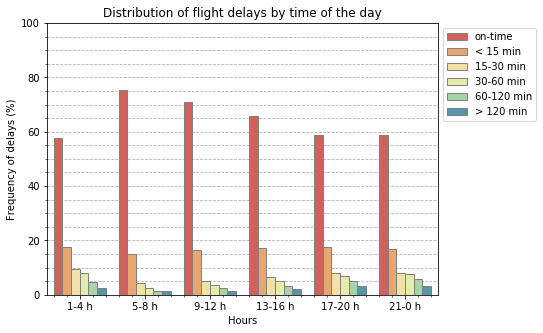

In [68]:
delays_count_hourbin = train_explor[['BIN_ARR_TIME', 'BIN_ARR_DELAY', 'ARR_DELAY_NEW']] \
                            .groupby(['BIN_ARR_TIME', 'BIN_ARR_DELAY']).agg('count').rename(columns={'ARR_DELAY_NEW': 'count'})

delay_per_hourbin = delays_count_hourbin.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())) \
                        .rename(columns={'count' : "frequency"})

plt.figure(figsize=(7,5))
grid = sns.barplot(x='BIN_ARR_TIME', y='frequency', hue='BIN_ARR_DELAY', data=delay_per_hourbin.reset_index(), 
                   palette=sns.color_palette("Spectral",6), edgecolor = 'grey', zorder=2,
                   order=['1-4 h', '5-8 h', '9-12 h', '13-16 h', '17-20 h', '21-0 h'])
plt.legend(bbox_to_anchor=(1.0, 1), loc=2)
grid.set_title('Distribution of flight delays by time of the day')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Hours')
grid.yaxis.grid( which='both', linestyle='--')
plt.ylim(0, 100)
grid.minorticks_on()
plt.show()

----
----
* ### The impact of flight duration/time (*CRS_ELAPSED_TIME*) on arrival delays

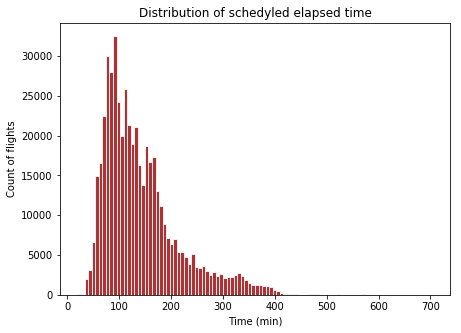

In [69]:
plt.figure(figsize=(7,5))
grid = sns.distplot(train_explor['CRS_ELAPSED_TIME'], kde=False, bins=100, color=sns.xkcd_rgb['blood red'], 
                    hist_kws={'edgecolor':'white',  'alpha':0.8})
grid.set_title('Distribution of schedyled elapsed time')
grid.set_ylabel('Count of flights')
grid.set_xlabel('Time (min)')
plt.show()

In [70]:
# binning CRS_ELAPSED_TIME into hourly intervals
pd.cut(train_explor['CRS_ELAPSED_TIME'], [0, 45, 90, 120, 180, 240, 750], 
       labels=['< 45 min','45-90 min', '90-120 min', '120-180 min', '180-240 min', '> 240 min']).value_counts().sort_index()

< 45 min         4034
45-90 min      132447
90-120 min     106765
120-180 min    146828
180-240 min     55874
> 240 min       54052
Name: CRS_ELAPSED_TIME, dtype: int64

In [173]:
def binning_elapsed_time(df):
    df['BIN_ELAPSED_TIME'] = pd.cut(df['CRS_ELAPSED_TIME'], [0, 45, 90, 120, 180, 240, 750], 
                                    labels=['< 45','45-90', '90-120', '120-180', '180-240', '> 240'])
    
    flights_FeatCtrl['BIN_ELAPSED_TIME'] = 4
    flights_FeatCtrl['CRS_ELAPSED_TIME'] = 5

In [174]:
for df in [train_explor, flights_train, flights_test]:
    binning_elapsed_time(df)

train_explor.sample(3)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,SCHEDULED_DEP,SCHEDULED_ARR,BIN_DEP_DELAY,BIN_ARR_DELAY,BIN_MONTH,AIRLINE,BIN_AIRLINE,HOUR_SCHEDULED_DEP,HOUR_SCHEDULED_ARR,BIN_DEP_TIME,BIN_ARR_TIME,BIN_ELAPSED_TIME,BIN_DISTANCE,AIRP_ORIGIN,AIRP_DEST,ROUTE
417719,2018,6,14,4,UA,405,LGA,"New York, NY",New York,DEN,"Denver, CO",Colorado,1140,0.0,1402,0.0,0,0,262.0,1620,11:40:00,14:02:00,on-time,on-time,Summer,United Air Lines Inc.,Full-service,11,14,9-12 h,13-16 h,> 240,> 1500,10.000-20.000,> 20.000,LGA-DEN
387033,2018,6,29,5,AA,1594,DTW,"Detroit, MI",Michigan,ORD,"Chicago, IL",Illinois,1204,0.0,1231,0.0,0,0,87.0,235,12:04:00,12:31:00,on-time,on-time,Summer,American Airlines Inc.,Full-service,12,12,9-12 h,9-12 h,45-90,< 250,10.000-20.000,> 20.000,DTW-ORD
325815,2018,10,13,6,DL,1103,FLL,"Fort Lauderdale, FL",Florida,MSP,"Minneapolis, MN",Minnesota,1535,0.0,1826,0.0,0,0,231.0,1487,15:35:00,18:26:00,on-time,on-time,Autumn,Delta Air Lines Inc.,Full-service,15,18,13-16 h,17-20 h,180-240,1000-1500,10.000-20.000,10.000-20.000,FLL-MSP


In [73]:
delays_count_elapsedtime = train_explor[['BIN_ELAPSED_TIME', 'BIN_ARR_DELAY', 'ARR_DELAY_NEW']] \
                                .groupby(['BIN_ELAPSED_TIME', 'BIN_ARR_DELAY']).agg('count') \
                                .rename(columns={'ARR_DELAY_NEW':'count'})

delay_per_elapsedtime = delays_count_elapsedtime.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())) \
                        .rename(columns={'count' : "frequency"})

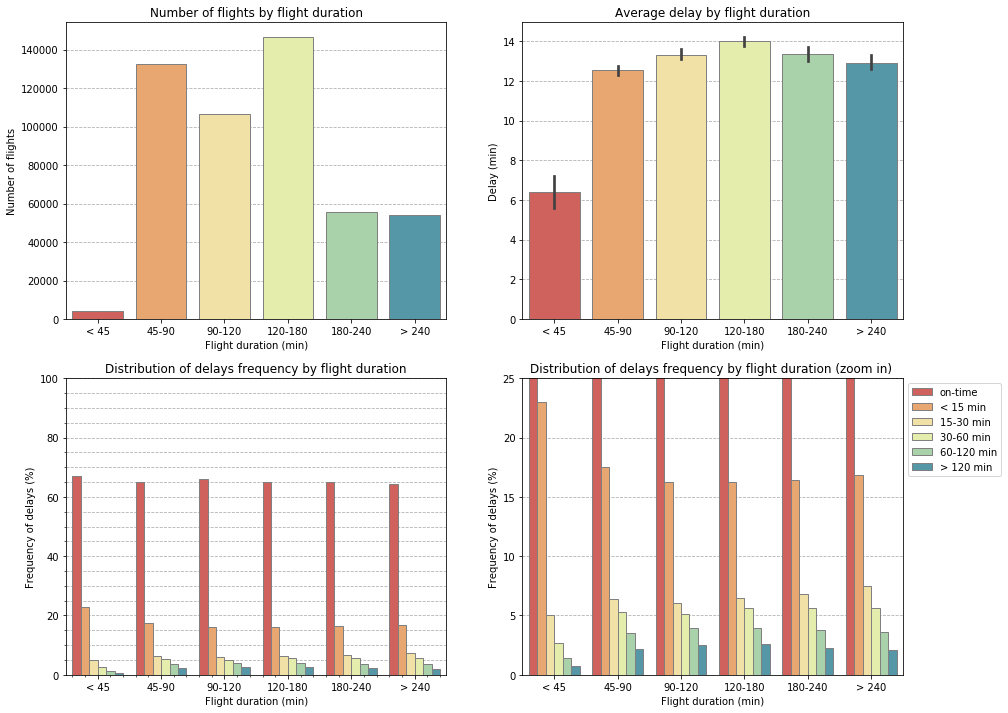

In [74]:
#----- total number of flights by flight duration -----
plt.figure(figsize=(15,12))
plt.subplot(221)
grid = sns.countplot(x='BIN_ELAPSED_TIME', data=train_explor, palette=sns.color_palette('Spectral', 6),
                    edgecolor='grey', zorder=2)
grid.set_title('Number of flights by flight duration')
grid.set_xlabel('Flight duration (min)')
grid.set_ylabel('Number of flights')
grid.yaxis.grid( which='both', linestyle='--')


#----- average delay at arrival by flight duration -----
plt.subplot(222)
grid = sns.barplot(x='BIN_ELAPSED_TIME', y='ARR_DELAY_NEW', data=train_explor, palette=sns.color_palette('Spectral', 6),
                  edgecolor='grey', zorder=2)
grid.set_title('Average delay by flight duration')
grid.set_xlabel('Flight duration (min)')
grid.set_ylabel('Delay (min)')
grid.yaxis.grid( which='both', linestyle='--')


#----- Distribution of delays frequency by flight duration -----
plt.subplot(223)
grid = sns.barplot(x='BIN_ELAPSED_TIME', y='frequency', hue='BIN_ARR_DELAY', data=delay_per_elapsedtime.reset_index(),
                   palette=sns.color_palette('Spectral', 6), edgecolor='grey', zorder=2)
grid.legend_.remove()
grid.set_title('Distribution of delays frequency by flight duration')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Flight duration (min)')
grid.yaxis.grid(which='both', linestyle='--')
plt.ylim(0, 100)
grid.minorticks_on()


#----- Distribution of delays frequency by flight duration (zooming in) -----
plt.subplot(224)
grid = sns.barplot(x='BIN_ELAPSED_TIME', y='frequency', hue='BIN_ARR_DELAY', data=delay_per_elapsedtime.reset_index(),
                   palette=sns.color_palette('Spectral', 6), edgecolor='grey', zorder=2)
plt.legend(bbox_to_anchor=(1.0, 1), loc=2)
grid.set_title('Distribution of delays frequency by flight duration (zoom in) ')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Flight duration (min)')
grid.yaxis.grid(which='both', linestyle='--')
plt.ylim(0, 25)
plt.show()

The punctuality of flights doesn't seem to change much with the flight time/duration, but delays do. Flights that last 45 min or less ran on schedule approximately 67% of the time, not that far from the 65%, give or take, of the longer flights. But their delays are usually shorter, with almost 23% of flights arriving with up to 15 min delay and around 5% arriving 30 min after scheduled. For flights that last longer than 45 min, on the other hand, delays over 30 min account for more than 11% of total flights and delaus over 120 min are 3 times more frequent.

----
----

* ### The impact of distance between airports on arrival delays

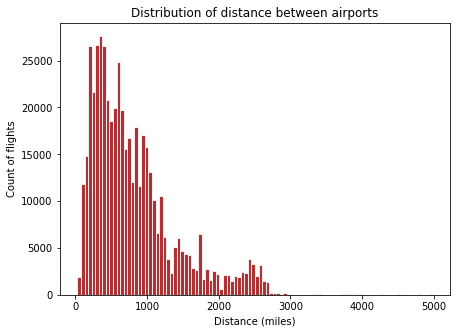

In [75]:
plt.figure(figsize=(7,5))
grid = sns.distplot(train_explor['DISTANCE'], kde=False, bins=100, color=sns.xkcd_rgb['blood red'], 
                    hist_kws={'edgecolor':'white', 'alpha':0.8})
grid.set_title('Distribution of distance between airports')
grid.set_ylabel('Count of flights')
grid.set_xlabel('Distance (miles)')
plt.show()

In [76]:
pd.cut(train_explor.DISTANCE, [0, 250, 500, 750, 1000, 1500, 5500]).value_counts().sort_index()

(0, 250]         65523
(250, 500]      122733
(500, 750]       97832
(750, 1000]      75744
(1000, 1500]     73209
(1500, 5500]     64959
Name: DISTANCE, dtype: int64

In [175]:
def binning_distance(df):
    df['BIN_DISTANCE'] = pd.cut(df['DISTANCE'], [0, 250, 500, 750, 1000, 1500, 5500], 
                                    labels=['< 250','250-500', '500-750', '750-1000', '1000-1500', '> 1500'])
    
    flights_FeatCtrl['BIN_DISTANCE'] = 4
    flights_FeatCtrl['BIN_DISTANCE'] = 5

In [176]:
for df in [train_explor, flights_train, flights_test]:
    binning_distance(df)

train_explor.sample(3)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,SCHEDULED_DEP,SCHEDULED_ARR,BIN_DEP_DELAY,BIN_ARR_DELAY,BIN_MONTH,AIRLINE,BIN_AIRLINE,HOUR_SCHEDULED_DEP,HOUR_SCHEDULED_ARR,BIN_DEP_TIME,BIN_ARR_TIME,BIN_ELAPSED_TIME,BIN_DISTANCE,AIRP_ORIGIN,AIRP_DEST,ROUTE
194808,2018,10,31,3,OO,4753,ONT,"Ontario, CA",California,SLC,"Salt Lake City, UT",Utah,1330,0.0,1617,0.0,0,0,107.0,558,13:30:00,16:17:00,on-time,on-time,Autumn,SkyWest Airlines Inc.,Regional,13,16,13-16 h,13-16 h,90-120,500-750,1.000-5.000,10.000-20.000,ONT-SLC
240975,2017,11,15,3,DL,1072,ATL,"Atlanta, GA",Georgia,PIT,"Pittsburgh, PA",Pennsylvania,2231,0.0,0015,0.0,0,0,104.0,526,22:31:00,00:15:00,on-time,on-time,Autumn,Delta Air Lines Inc.,Full-service,22,0,21-0 h,21-0 h,90-120,500-750,> 20.000,5.000-10.000,ATL-PIT
341541,2018,1,18,4,WN,490,LBB,"Lubbock, TX",Texas,DAL,"Dallas, TX",Texas,1650,0.0,1800,0.0,0,0,70.0,293,16:50:00,18:00:00,on-time,on-time,Winter,Southwest Airlines Co.,Low_cost,16,18,13-16 h,17-20 h,45-90,250-500,< 1.000,5.000-10.000,LBB-DAL


In [79]:
delays_count_distance = train_explor[['BIN_DISTANCE', 'BIN_ARR_DELAY', 'ARR_DELAY_NEW']] \
                                .groupby(['BIN_DISTANCE', 'BIN_ARR_DELAY']).agg('count') \
                                .rename(columns={'ARR_DELAY_NEW':'count'})

delay_per_distance = delays_count_distance.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())) \
                        .rename(columns={'count' : "frequency"})

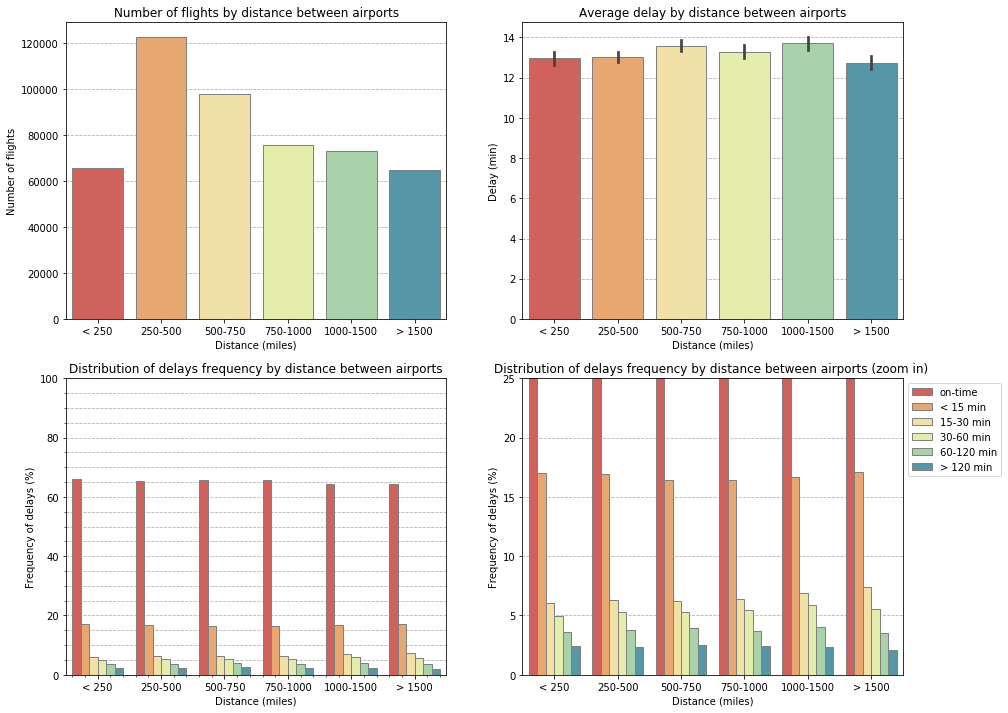

In [80]:
#----- total number of flights by distance between airports -----
plt.figure(figsize=(15,12))
plt.subplot(221)
grid = sns.countplot(x='BIN_DISTANCE', data=train_explor, palette=sns.color_palette('Spectral', 6),
                    edgecolor='grey', zorder=2)
grid.set_title('Number of flights by distance between airports')
grid.set_xlabel('Distance (miles)')
grid.set_ylabel('Number of flights')
grid.yaxis.grid( which='both', linestyle='--')


#----- average delay at arrival by distance between airports -----
plt.subplot(222)
grid = sns.barplot(x='BIN_DISTANCE', y='ARR_DELAY_NEW', data=train_explor, palette=sns.color_palette('Spectral', 6),
                  edgecolor='grey', zorder=2)
grid.set_title('Average delay by distance between airports')
grid.set_xlabel('Distance (miles)')
grid.set_ylabel('Delay (min)')
grid.yaxis.grid( which='both', linestyle='--')


#----- Distribution of delays frequency by distance between airports -----
plt.subplot(223)
grid = sns.barplot(x='BIN_DISTANCE', y='frequency', hue='BIN_ARR_DELAY', data=delay_per_distance.reset_index(),
                   palette=sns.color_palette('Spectral', 6), edgecolor='grey', zorder=2)
grid.legend_.remove()
grid.set_title('Distribution of delays frequency by distance between airports')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Distance (miles)')
grid.yaxis.grid(which='both', linestyle='--')
plt.ylim(0, 100)
grid.minorticks_on()


#----- Distribution of delays frequency by distance between airports (zooming in) -----
plt.subplot(224)
grid = sns.barplot(x='BIN_DISTANCE', y='frequency', hue='BIN_ARR_DELAY', data=delay_per_distance.reset_index(),
                   palette=sns.color_palette('Spectral', 6), edgecolor='grey', zorder=2)
plt.legend(bbox_to_anchor=(1.0, 1), loc=2)
grid.set_title('Distribution of delays frequency by distance between airports (zoom in) ')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Distance (miles)')
grid.yaxis.grid(which='both', linestyle='--')
plt.ylim(0, 25)
plt.show()

There isn't a clear correlation between distance between airports and flight delays. Regardless of the distance between airports, 65% of flights arrived on scheduled and 16% with up to 15 min of delay. Delays over 30 min increase 2-3% at maximum with travelled distance.

So far, from what we have seen, time of the day, month of the year and airline have much more influence over punctuality and delays than some flight aspects such as the distance between airports and flight duration. Perhaps the size of airport may also play some important role on delays, specially those attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.

----
----

* ### The impact of airports (origin and destination) on arrival delays

In [81]:
train_explor.DEST.describe()

count     500000
unique       354
top          ATL
freq       27595
Name: DEST, dtype: object

In [82]:
# binning airports into categories based on their capacity (number of flights per month) because 354 airports are too many
xx = ((flights_train.DEST.value_counts() + flights_train.ORIGIN.value_counts()) / len(flights_train.MONTH.unique())) \
            .sort_values(ascending=False)
pd.cut(xx, [0, 1000, 5000, 10000, 20000, 50000], labels = ['< 1.000',' 1000-5.000','5.000-10.000', '10.000-20.000','> 20.000']).value_counts().sort_index()

< 1.000          251
 1000-5.000       57
5.000-10.000      21
10.000-20.000     17
> 20.000           9
dtype: int64

In [177]:
def airports_capacity_bins(df):
    airports_flights_per_month = (flights_train['ORIGIN'].value_counts() + flights_train['DEST'] \
                                  .value_counts()) / len(flights_train.MONTH.unique())
    airport_bin = pd.cut(airports_flights_per_month, [0, 1000, 5000, 10000, 20000, 50000], 
                         labels = ['< 1.000',' 1.000-5.000','5.000-10.000', '10.000-20.000','> 20.000'])
    df['AIRP_ORIGIN'] = df['ORIGIN'].map(airport_bin)
    df['AIRP_DEST'] = df["DEST"].map(airport_bin)
    
    flights_FeatCtrl['AIRP_ORIGIN'] = 4
    flights_FeatCtrl['AIRP_DEST'] = 4
    flights_FeatCtrl['ORIGIN'] = 5
    flights_FeatCtrl['DEST'] = 5

In [178]:
for df in [train_explor, flights_train, flights_test]:
    airports_capacity_bins(df)

In [85]:
train_explor.sample(3)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,SCHEDULED_DEP,SCHEDULED_ARR,BIN_DEP_DELAY,BIN_ARR_DELAY,BIN_MONTH,AIRLINE,BIN_AIRLINE,HOUR_SCHEDULED_DEP,HOUR_SCHEDULED_ARR,BIN_DEP_TIME,BIN_ARR_TIME,BIN_ELAPSED_TIME,BIN_DISTANCE,AIRP_ORIGIN,AIRP_DEST
126457,2018,2,2,5,NK,970,DEN,"Denver, CO",Colorado,FLL,"Fort Lauderdale, FL",Florida,2359,0.0,0540,0.0,0,0,221.0,1703,23:59:00,05:40:00,on-time,on-time,Winter,Spirit Air Lines,Low_cost,23,5,21-0 h,5-8 h,180-240,> 1500,> 20.000,10.000-20.000
349076,2018,4,1,7,MQ,3923,GSO,"Greensboro/High Point, NC",North Carolina,ORD,"Chicago, IL",Illinois,1622,0.0,1744,0.0,0,0,142.0,589,16:22:00,17:44:00,on-time,on-time,Spring,Envoy Air,Regional,16,17,13-16 h,17-20 h,120-180,500-750,1.000-5.000,> 20.000
462415,2018,6,10,7,UA,830,ORD,"Chicago, IL",Illinois,BUF,"Buffalo, NY",New York,2159,119.0,0032,115.0,0,0,93.0,474,21:59:00,00:32:00,60-120 min,60-120 min,Summer,United Air Lines Inc.,Full-service,21,0,21-0 h,21-0 h,90-120,250-500,> 20.000,1.000-5.000


In [86]:
#normalizing by percentage airport of destination
delays_count_airport = train_explor[['AIRP_DEST', 'BIN_ARR_DELAY', 'ARR_DELAY_NEW']] \
                                .groupby(['AIRP_DEST', 'BIN_ARR_DELAY']).agg('count') \
                                .rename(columns={'ARR_DELAY_NEW':'count'})

delay_per_airport = delays_count_airport.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())) \
                        .rename(columns={'count' : "frequency"})

In [107]:
#normalizing by percentage airport of origin
delays_count_airport_dep = train_explor[['AIRP_ORIGIN', 'BIN_ARR_DELAY', 'ARR_DELAY_NEW']] \
                                .groupby(['AIRP_ORIGIN', 'BIN_ARR_DELAY']).agg('count') \
                                .rename(columns={'ARR_DELAY_NEW':'count'})

delay_per_airport_dep = delays_count_airport_dep.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())) \
                        .rename(columns={'count' : "frequency"})

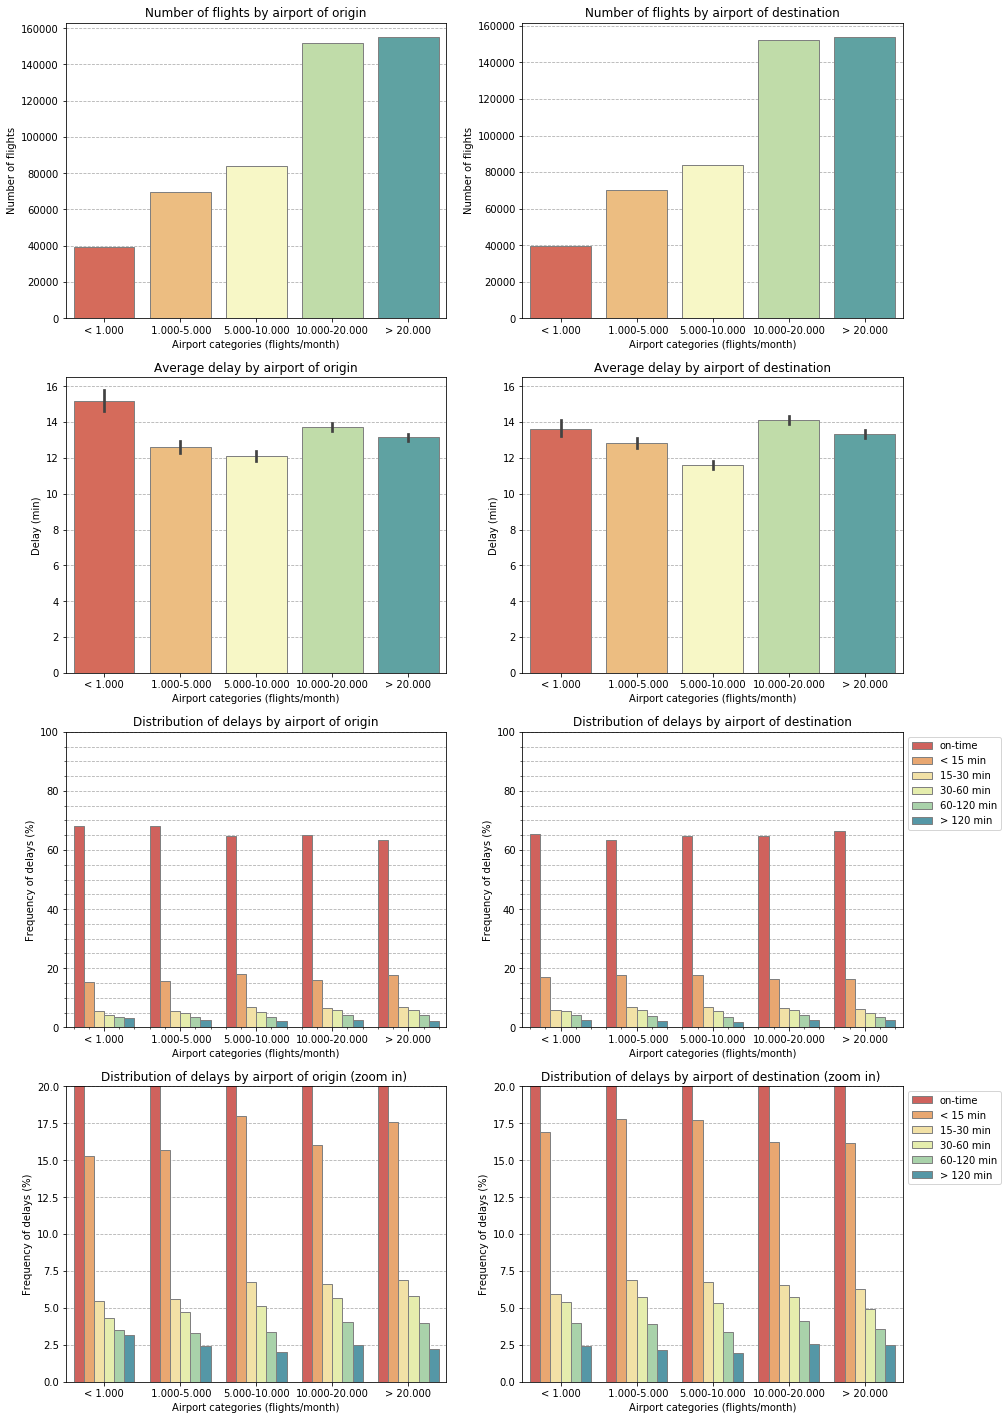

In [104]:
#----- total number of flights by airports -----
plt.figure(figsize=(15,24))
plt.subplot(421)
grid = sns.countplot(x='AIRP_ORIGIN', data=train_explor, palette=sns.color_palette('Spectral', 5),
                    edgecolor='grey', zorder=2)
grid.set_title('Number of flights by airport of origin')
grid.set_xlabel('Airport categories (flights/month)')
grid.set_ylabel('Number of flights')
grid.yaxis.grid( which='both', linestyle='--')

plt.subplot(422)
grid = sns.countplot(x='AIRP_DEST', data=train_explor, palette=sns.color_palette('Spectral', 5),
                    edgecolor='grey', zorder=2)
grid.set_title('Number of flights by airport of destination')
grid.set_xlabel('Airport categories (flights/month)')
grid.set_ylabel('Number of flights')
grid.yaxis.grid( which='both', linestyle='--')



#----- average delay at arrival by airports -----
plt.subplot(423)
grid = sns.barplot(x='AIRP_ORIGIN', y='ARR_DELAY_NEW', data=train_explor, palette=sns.color_palette('Spectral', 5),
                  edgecolor='grey', zorder=2)
grid.set_title('Average delay by airport of origin')
grid.set_xlabel('Airport categories (flights/month)')
grid.set_ylabel('Delay (min)')
grid.yaxis.grid( which='both', linestyle='--')
plt.ylim(0, 16.5)

plt.subplot(424)
grid = sns.barplot(x='AIRP_DEST', y='ARR_DELAY_NEW', data=train_explor, palette=sns.color_palette('Spectral', 5),
                  edgecolor='grey', zorder=2)
grid.set_title('Average delay by airport of destination')
grid.set_xlabel('Airport categories (flights/month)')
grid.set_ylabel('Delay (min)')
grid.yaxis.grid( which='both', linestyle='--')
plt.ylim(0, 16.5)



#----- Distribution of delays frequency by airports -----
plt.subplot(425)
grid = sns.barplot(x='AIRP_ORIGIN', y='frequency', hue='BIN_ARR_DELAY', data=delay_per_airport_dep.reset_index(),
                   palette=sns.color_palette('Spectral', 6), edgecolor='grey', zorder=2)
grid.legend_.remove()
grid.set_title('Distribution of delays by airport of origin')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Airport categories (flights/month)')
grid.yaxis.grid(which='both', linestyle='--')
plt.ylim(0, 100)
grid.minorticks_on()

plt.subplot(426)
grid = sns.barplot(x='AIRP_DEST', y='frequency', hue='BIN_ARR_DELAY', data=delay_per_airport.reset_index(),
                   palette=sns.color_palette('Spectral', 6), edgecolor='grey', zorder=2)
plt.legend(bbox_to_anchor=(1.0, 1), loc=2)
grid.set_title('Distribution of delays by airport of destination')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Airport categories (flights/month)')
grid.yaxis.grid(which='both', linestyle='--')
plt.ylim(0, 100)
grid.minorticks_on()




#----- Distribution of delays frequency by airports (zooming in) -----
plt.subplot(427)
grid = sns.barplot(x='AIRP_ORIGIN', y='frequency', hue='BIN_ARR_DELAY', data=delay_per_airport_dep.reset_index(),
                   palette=sns.color_palette('Spectral', 6), edgecolor='grey', zorder=2)
grid.legend_.remove()
grid.set_title('Distribution of delays by airport of origin (zoom in) ')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Airport categories (flights/month)')
grid.yaxis.grid(which='both', linestyle='--')
plt.ylim(0, 20)

plt.subplot(428)
grid = sns.barplot(x='AIRP_DEST', y='frequency', hue='BIN_ARR_DELAY', data=delay_per_airport.reset_index(),
                   palette=sns.color_palette('Spectral', 6), edgecolor='grey', zorder=2)
plt.legend(bbox_to_anchor=(1.0, 1), loc=2)
grid.set_title('Distribution of delays by airport of destination (zoom in) ')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Airport categories (flights/month)')
grid.yaxis.grid(which='both', linestyle='--')
plt.ylim(0, 20)
plt.show()

Apparently the airport of origin plays some role on delays at arrival, even more than the airport of destination. It seems that flights are more prone to delays, particularly delays over 15 min, when departing from airports with more than 5000 flights/month (> 167 flights/day on average), independently of their destination.         
But, interestingly, delays over 2h were more frequent on flights departing from less busy airports, with less than 1000 flights/month.


----
----

In [120]:
# flights on-time -- both on departure and arrival (delay dep = 0 and delay arr = 0)
ontime_arr_dep = train_explor[(train_explor.DEP_DELAY_NEW == 0) & (train_explor.ARR_DELAY_NEW == 0)]

#flights that arrived on-time even though it departed late -- it did "make up time" in the air (delay dep > 0 and delay arr = 0)
ontime_arr_delay_dep = train_explor[(train_explor.DEP_DELAY_NEW > 0) & (train_explor.ARR_DELAY_NEW == 0)]

#flights that arrived late even though it departed on-time -- it was longer than expected (delay dep = 0 and delay arr > 0)
delay_arr_ontime_dep = train_explor[(train_explor.DEP_DELAY_NEW == 0) & (train_explor.ARR_DELAY_NEW > 0)]

#flights delayed -- both on departure and arrival (delay dep > 0 and delay arr > 0)
delay_arr_dep = train_explor[(train_explor.DEP_DELAY_NEW > 0) & (train_explor.ARR_DELAY_NEW > 0)]

In [121]:
delay_arr_dep['DIFF_DEP_ARR_DELAY'] = delay_arr_dep.ARR_DELAY_NEW - delay_arr_dep.DEP_DELAY_NEW

#Flights that arrived later than expected (delay arr > delay dep)
delay_arr_greater_dep = delay_arr_dep[delay_arr_dep.DIFF_DEP_ARR_DELAY > 0]

#Flights that did "make up some time" in the air (delay arr < delay dep)
delay_arr_shorter_dep = delay_arr_dep[delay_arr_dep.DIFF_DEP_ARR_DELAY < 0]

#Flights that were as delayed at arrival as at departure (delay arr = delay dep)
delay_arr_equal_dep = delay_arr_dep[delay_arr_dep.DIFF_DEP_ARR_DELAY == 0]

C:\Users\Lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


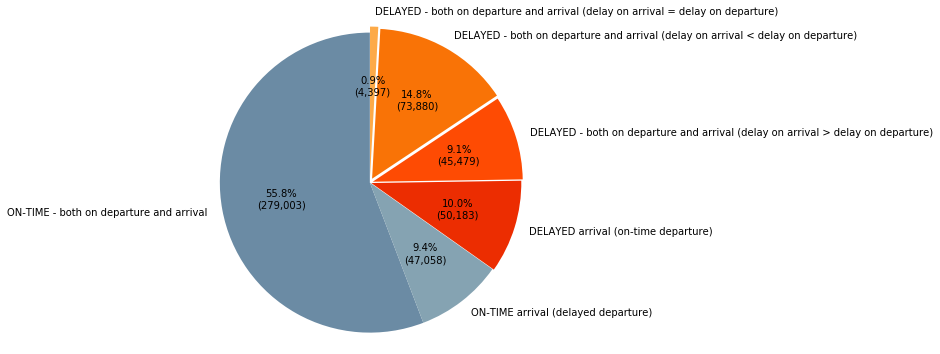

In [131]:
labels = ['ON-TIME - both on departure and arrival', 'ON-TIME arrival (delayed departure)', 
          'DELAYED arrival (on-time departure)', 
          'DELAYED - both on departure and arrival (delay on arrival > delay on departure)',
          'DELAYED - both on departure and arrival (delay on arrival < delay on departure)', 
          'DELAYED - both on departure and arrival (delay on arrival = delay on departure)']
sizes = [len(ontime_arr_dep), len(ontime_arr_delay_dep), len(delay_arr_ontime_dep), len(delay_arr_greater_dep),
        len(delay_arr_shorter_dep), len(delay_arr_equal_dep)]
colors = ['#6b8ba4','#85a3b2','#ec2d01','#fe4b03', '#f97306','#fdaa48'] 
explodeTuple = (0.0, 0.0, 0.01,0.02,0.03,0.04)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=lambda p:'{:.1f}%\n({:,.0f})'.format(p,p*sum(sizes)/100), colors=colors, 
        explode=explodeTuple, startangle=90)
ax1.axis('equal') 
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [125]:
#normalizing by percentage delay at airport of origin
delays_count_airport_deparr = train_explor[['BIN_DEP_DELAY', 'BIN_ARR_DELAY', 'ARR_DELAY_NEW']] \
                                .groupby(['BIN_DEP_DELAY', 'BIN_ARR_DELAY']).agg('count') \
                                .rename(columns={'ARR_DELAY_NEW':'count'})

delay_per_airport_deparr = delays_count_airport_deparr.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())) \
                        .rename(columns={'count' : "frequency"})

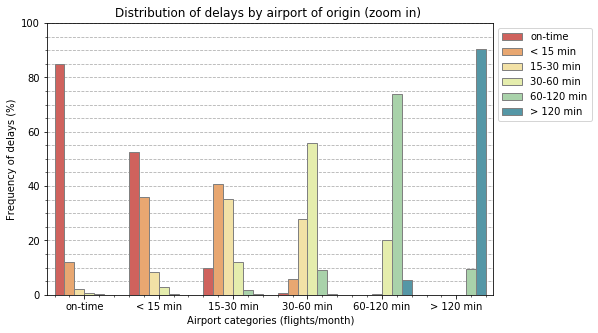

In [130]:
plt.figure(figsize=(8,5))
grid = sns.barplot(x='BIN_DEP_DELAY', y='frequency', hue='BIN_ARR_DELAY', data=delay_per_airport_deparr.reset_index(),
                   palette=sns.color_palette('Spectral', 6), edgecolor='grey', zorder=2)
plt.legend(bbox_to_anchor=(1.0, 1), loc=2)
grid.set_title('Distribution of delays by airport of origin (zoom in) ')
grid.set_ylabel('Frequency of delays (%)')
grid.set_xlabel('Airport categories (flights/month)')
grid.yaxis.grid(which='both', linestyle='--')
grid.minorticks_on()
plt.ylim(0, 100)
plt.show()

-----------
-----------
* Almost 65% of all flights arrived on time, some of which (9.4%) manage to "make up time" and arrived on-time even with a delayed departure. 27% of all flights that were late on departure arrived on-time.                    
* From all flights that depart on-time, only 15% arrived late, and most of them were not more than 15 min late.
* As the delay on departure increases, the probability of arriving on-time decreases. Around 52% of all flights that departed up to 15 min late arrived on-time. Punctuality decreases to 10% and 1% for flights delayed between 15-30 min and 30-60 min, respectively.
* 73% of all flights that departed late managed to "make up some time" on the air. 
* Around 25% of all flights delayed more than expected (delay on arrival > delay on departure). (due to the national aviation system, maybe?).


-------------
-------------

In [163]:
train_explor.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,SCHEDULED_DEP,SCHEDULED_ARR,BIN_DEP_DELAY,BIN_ARR_DELAY,BIN_MONTH,AIRLINE,BIN_AIRLINE,HOUR_SCHEDULED_DEP,HOUR_SCHEDULED_ARR,BIN_DEP_TIME,BIN_ARR_TIME,BIN_ELAPSED_TIME,BIN_DISTANCE,AIRP_ORIGIN,AIRP_DEST,ROUTE
0,2017,11,13,1,UA,1205,KOA,"Kona, HI",Hawaii,LAX,"Los Angeles, CA",California,1331,1.0,2108,0.0,0,0,337.0,2504,13:31:00,21:08:00,< 15 min,on-time,Autumn,United Air Lines Inc.,Full-service,13,21,13-16 h,21-0 h,> 240,> 1500,1.000-5.000,> 20.000,KOA-LAX
1,2017,11,26,7,WN,5585,TPA,"Tampa, FL",Florida,BWI,"Baltimore, MD",Maryland,1425,30.0,1640,20.0,0,0,135.0,842,14:25:00,16:40:00,15-30 min,15-30 min,Autumn,Southwest Airlines Co.,Low_cost,14,16,13-16 h,13-16 h,120-180,750-1000,5.000-10.000,10.000-20.000,TPA-BWI
2,2018,1,13,6,AA,1212,DFW,"Dallas/Fort Worth, TX",Texas,MCO,"Orlando, FL",Florida,1430,0.0,1758,14.0,0,0,148.0,985,14:30:00,17:58:00,on-time,< 15 min,Winter,American Airlines Inc.,Full-service,14,17,13-16 h,17-20 h,120-180,750-1000,> 20.000,10.000-20.000,DFW-MCO
3,2018,10,26,5,DL,305,DTW,"Detroit, MI",Michigan,PVD,"Providence, RI",Rhode Island,0805,0.0,0959,0.0,0,0,114.0,615,08:05:00,09:59:00,on-time,on-time,Autumn,Delta Air Lines Inc.,Full-service,8,9,5-8 h,9-12 h,90-120,500-750,10.000-20.000,1.000-5.000,DTW-PVD
4,2018,8,31,5,AS,501,IND,"Indianapolis, IN",Indiana,SEA,"Seattle, WA",Washington,1835,0.0,2035,0.0,0,0,300.0,1866,18:35:00,20:35:00,on-time,on-time,Summer,Alaska Airlines Inc.,Full-service,18,20,17-20 h,17-20 h,> 240,> 1500,5.000-10.000,10.000-20.000,IND-SEA


* ### Updating feature control dataframe

In [180]:
flights_FeatCtrl['YEAR'] = 2
flights_FeatCtrl['OP_CARRIER_FL_NUM'] = 2
flights_FeatCtrl['ORIGIN_CITY_NAME'] = 2
flights_FeatCtrl['ORIGIN_STATE_NM'] = 2
flights_FeatCtrl['DEST_CITY_NAME'] = 2
flights_FeatCtrl['DEST_STATE_NM'] = 2
flights_FeatCtrl['CRS_DEP_TIME'] = 2
flights_FeatCtrl['CRS_ARR_TIME'] = 2
flights_FeatCtrl['DAY_OF_MONTH'] = 1
flights_FeatCtrl['DAY_OF_WEEK'] = 1

flights_FeatCtrl

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,SCHEDULED_DEP,SCHEDULED_ARR,BIN_DEP_DELAY,BIN_ARR_DELAY,BIN_MONTH,BIN_AIRLINE,BIN_DEP_TIME,BIN_ARR_TIME,BIN_ELAPSED_TIME,BIN_DISTANCE,AIRP_ORIGIN,AIRP_DEST
0,2,5,1,1,5,2,5,2,2,5,2,2,2,5,2,1,2,2,5,0,3,3,4,2,4,4,4,4,4,5,4,4


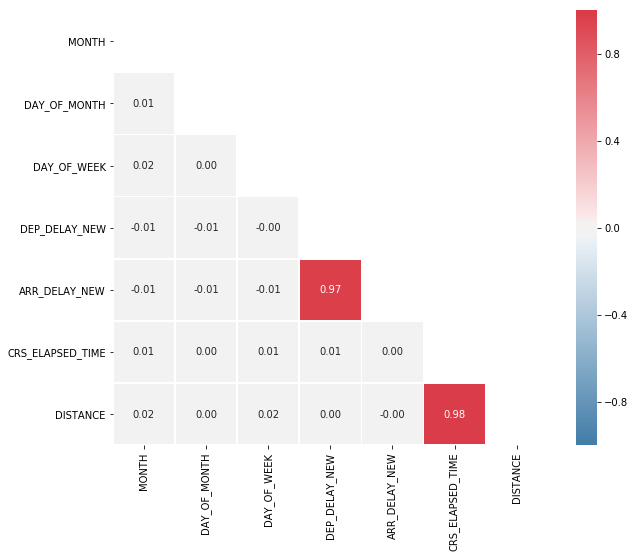

In [166]:
columns_to_keep = flights_FeatCtrl.loc[:, (flights_FeatCtrl != 2).any(axis=0)].columns

corr = flights_train[columns_to_keep].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
grid = sns.heatmap(corr, mask=mask, square=True, annot=True, fmt='.2f', cmap=cmap, vmin=-1, center=0, linewidths=.5)
plt.show()